<a href="https://colab.research.google.com/github/whgustj00/MyFile/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C(2019315031_%EC%A1%B0%ED%98%84%EC%84%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인도의 도시별 2012년 ~ 2021년의 4월~6월 기상 데이터를 통한 비지니스, 마케팅 분석

In [ ]:
# 필요한 패키지 설치

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
plt.rcParams['figure.dpi'] = 150

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,705 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and dire

In [ ]:
# 한글 폰트로 변경
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')


In [ ]:
# 데이터 불러오기
df = pd.read_csv("/content/temp.csv")

# 데이터 샘플 확인
df.head()

NameError: name 'pd' is not defined

해당 데이터는 4~6월간 인도의 도시별 기상 데이터들이다.

데이터셋의 이상치, 결측치, 중복값들을 처리하기 위한 전처리 과정을 거치고 시각화를 할 것이다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              13650 non-null  object 
 1   Date              13650 non-null  object 
 2   tempmax           13615 non-null  float64
 3   tempmin           13615 non-null  float64
 4   temp              13605 non-null  float64
 5   feelslikemax      13614 non-null  float64
 6   feelslikemin      13614 non-null  float64
 7   feelslike         13604 non-null  float64
 8   dew               13605 non-null  float64
 9   humidity          13605 non-null  float64
 10  windspeed         13605 non-null  float64
 11  winddir           13600 non-null  float64
 12  sealevelpressure  10631 non-null  float64
 13  cloudcover        13605 non-null  float64
 14  visibility        13605 non-null  float64
 15  sunrise           13650 non-null  object 
 16  sunset            13650 non-null  object

각 변수에 대한 설명

City: 도시 이름

Date: 날짜

tempmax: 최대 온도

tempmin: 최소 온도

temp: 평균 온도

feelslikemax: 최대 체감 온도

feelslikemin: 최소 체감 온도

feelslike: 평균 체감 온도

dew: 이슬점

humidity: 습도

windspeed: 풍속

winddir: 풍향

sealevelpressure: 해면 기압

cloudcover: 운량

visibility: 가시성

sunrise: 일출 시간

sunset: 일몰 시간

moonphase: 달의 형태

conditions: 날씨 상태

description: 날씨 설명


<ipython-input-54-c53aadca1d9b>:13: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


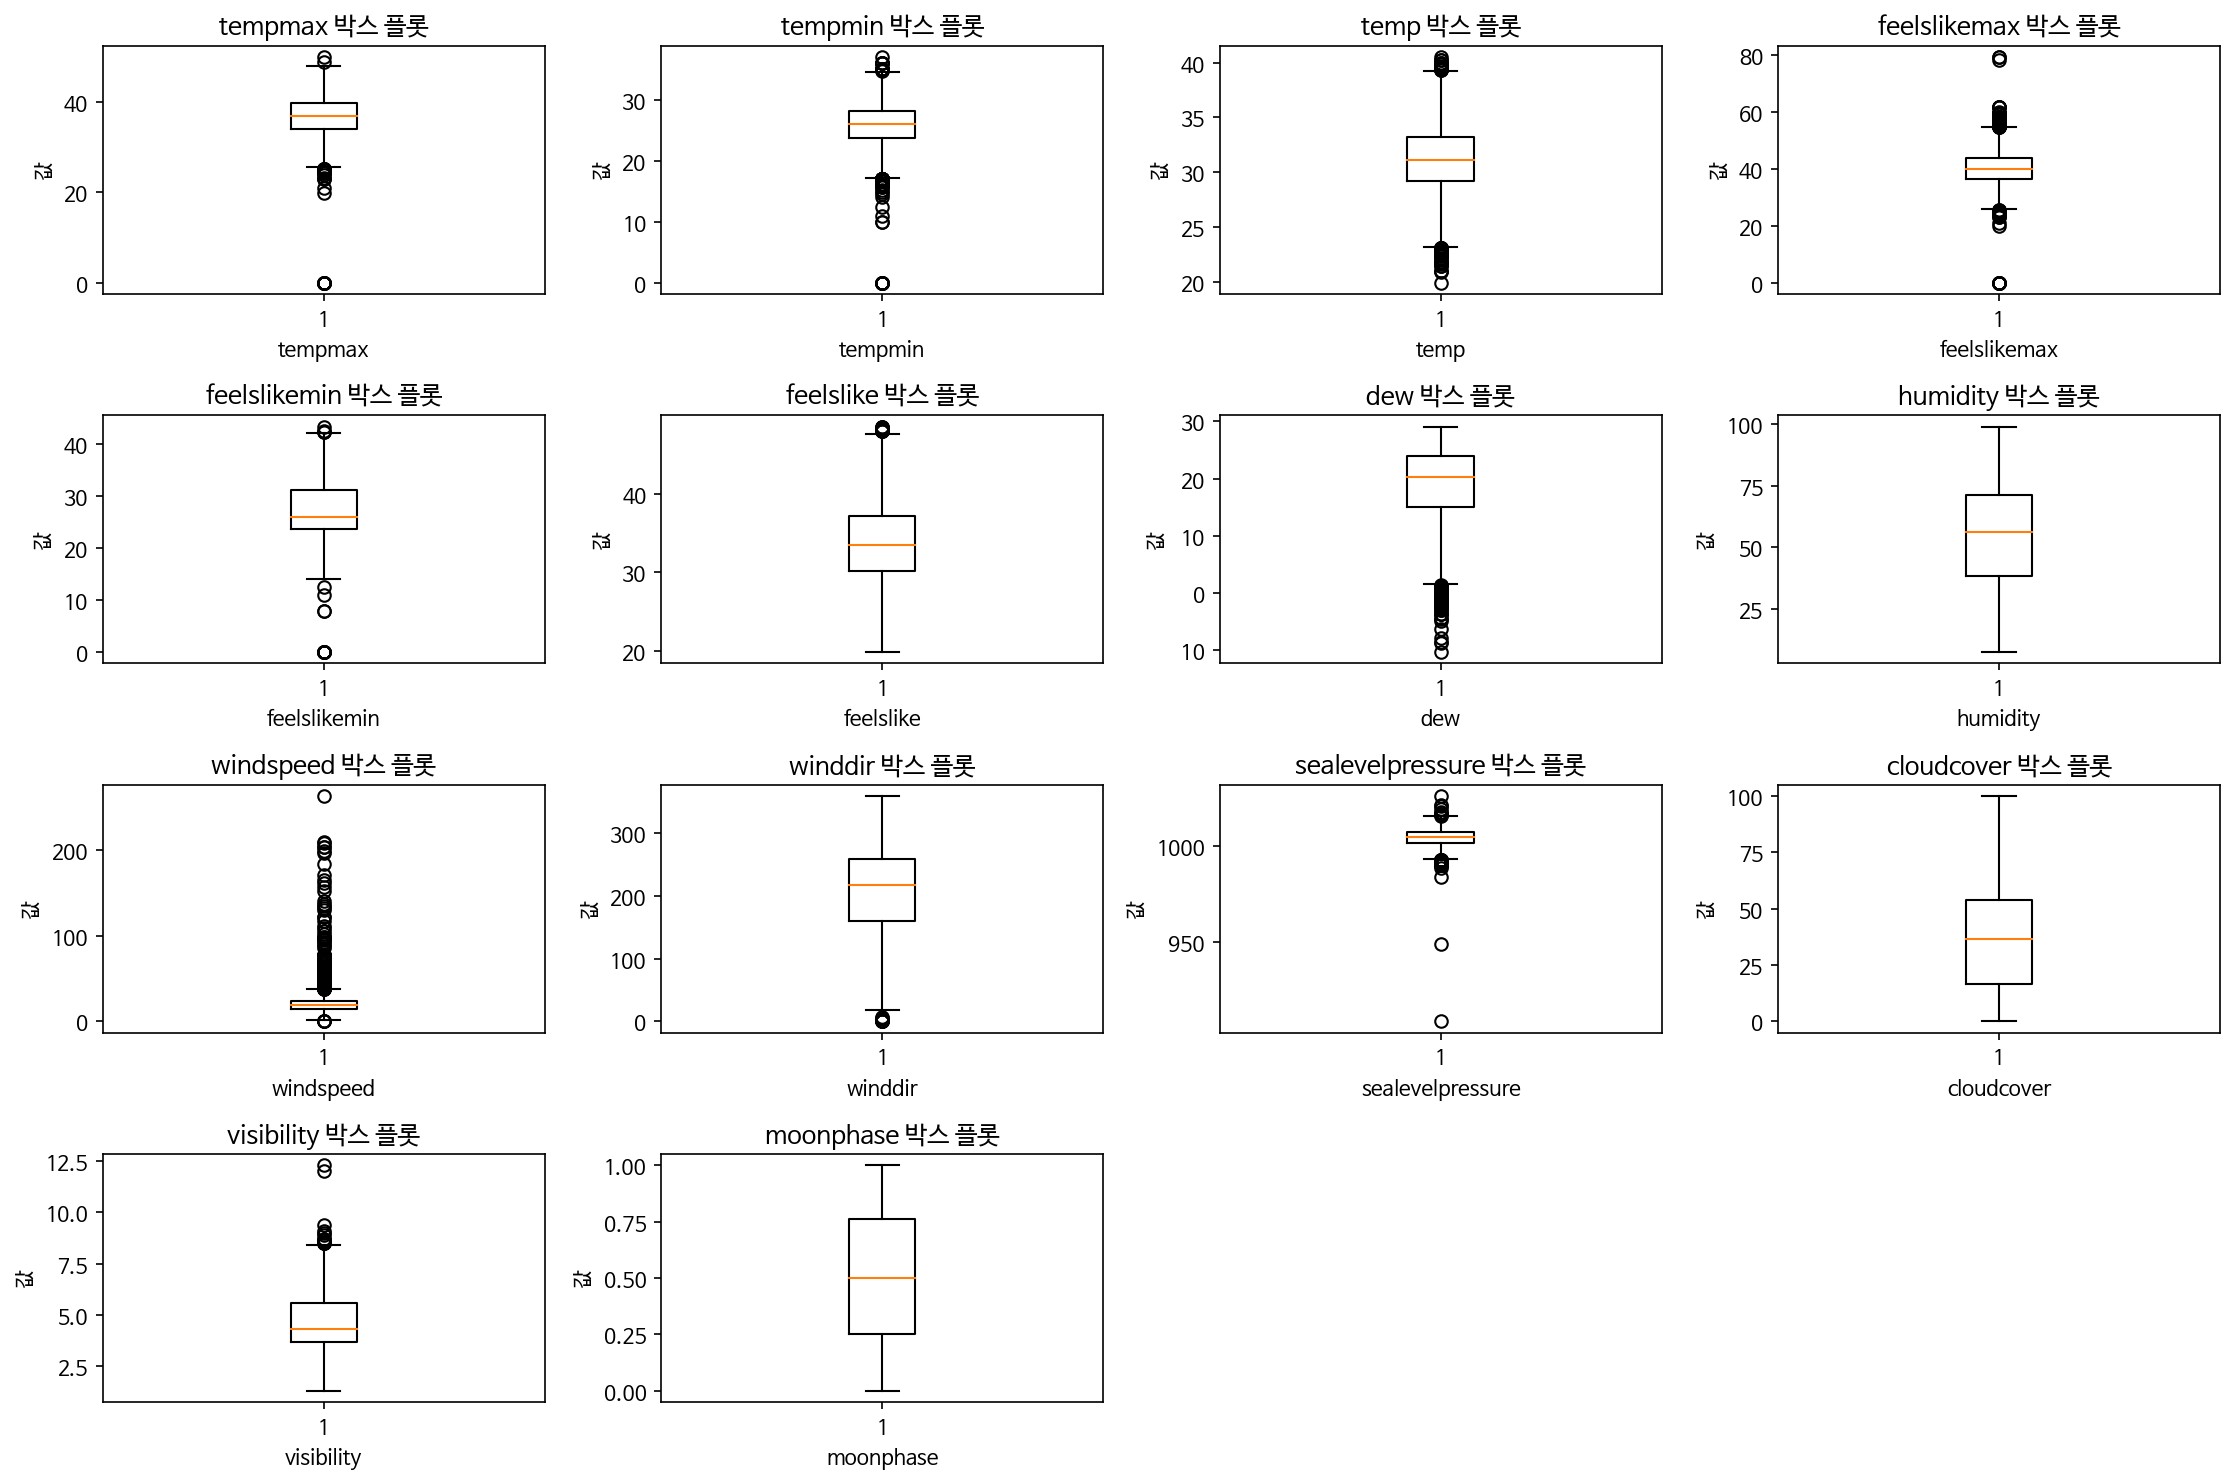

In [ ]:
# 수치형 변수 선택
numeric_variables = df.select_dtypes(include='number')

# 각 변수에 대한 박스 플롯 그리기
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_variables.columns, start=1):
    plt.subplot(4, 4, i)
    plt.boxplot(df[col].dropna())
    plt.title(col + ' 박스 플롯')
    plt.xlabel(col)
    plt.ylabel('값')

plt.tight_layout()
plt.show()


수치형 변수들의 이상치들을 보기 위해 박스 플롯을 그려봤다.

눈여겨 볼 이상치들은 인도의 4~6월 시기상으로 맞지 않게 기온과 체감온도가 0인 데이터들이다.

In [ ]:
# 0이 되면 안 되는 이상치 확인을 위한 행 출력
zero_rows = df[(df[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike']] == 0).any(axis=1)]
zero_index = zero_rows.index

print(zero_rows)

         City        Date  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
12275  Jaipur  2013-06-21      0.0      0.0   NaN           0.0           0.0   
12276  Jaipur  2013-06-22      0.0      0.0   NaN           0.0           0.0   
12277  Jaipur  2013-06-23      0.0      0.0   NaN           0.0           0.0   
12278  Jaipur  2013-06-24      0.0      0.0   NaN           0.0           0.0   
12279  Jaipur  2013-06-25      0.0      0.0   NaN           0.0           0.0   
12280  Jaipur  2013-06-26      0.0      0.0   NaN           0.0           0.0   
12281  Jaipur  2013-06-27      0.0      0.0   NaN           0.0           0.0   
12282  Jaipur  2013-06-28      0.0      0.0   NaN           0.0           0.0   
12283  Jaipur  2013-06-29      0.0      0.0   NaN           0.0           0.0   
12284  Jaipur  2013-06-30      0.0      0.0   NaN           0.0           0.0   

       feelslike  dew  humidity  windspeed  winddir  sealevelpressure  \
12275        NaN  NaN       NaN    

데이터 누락으로 인한 이상치가 맞는지 확인하기 위해 각 행들을 출력했다.

dew(이슬점)는 적지만 음수의 값도 가지며 0도 의미 있는 데이터라고 생각했기 때문에 제외했다.

windspeed(풍속), winddir(풍향), cloudcover(운량), moonphase(달 형상) 등은 0이라는 수치가 의미를 가지고 있기 때문에 제외했다.

(풍속이 0.5m/s(1knot) 이하일 때를 정온(calm)이라 하며, 풍향은 없는 것으로 하여 기록할 때 '00'로 표기한다.)

출력된 행들을 보면 결측치를 갖고 있으며 데이터가 누락된 것으로 판단하고 전처리 과정을 거쳐야 한다.

In [ ]:
# 0으로 나온 이상치들을 NaN으로 대체
for index in zero_index:
    df.iloc[index] = df.iloc[index].replace(0, np.nan)


0으로 나온 이상치들을 결측치로 전환해주었다.

In [ ]:
# 각 열에 대한 결측치 확인
missing_values = df.isnull().sum()

print("결측치 개수:")
print(missing_values)

결측치 개수:
City                   0
Date                   0
tempmax               45
tempmin               45
temp                  45
feelslikemax          46
feelslikemin          46
feelslike             46
dew                   45
humidity              45
windspeed             45
winddir               50
sealevelpressure    3019
cloudcover            45
visibility            45
sunrise                0
sunset                 0
moonphase              0
conditions            45
description           45
dtype: int64


데이터셋의 결측치를 확인한다.

In [ ]:
# 결측치를 전 후 값의 중간값으로 치환
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# 특히 결측치가 많았던 기간의 행들 출력
for index in zero_index:
    print(df.iloc[index])

City                                           Jaipur
Date                                       2013-06-21
tempmax                                          36.0
tempmin                                          28.0
temp                                             32.3
feelslikemax                                     39.7
feelslikemin                                     31.1
feelslike                                        36.3
dew                                              22.3
humidity                                        57.29
windspeed                                        20.5
winddir                                         196.7
sealevelpressure                               1004.8
cloudcover                                       50.0
visibility                                        3.7
sunrise                           2013-06-21 05:33:29
sunset                            2013-06-21 19:23:36
moonphase                                        0.47
conditions                  

시계열 데이터의 특성을 살려 결측치를 전 후 데이터 값의 중간으로 채웠다.

특히 결측치가 많았던 구간을 출력하여 제대로 치환되어있는지 확인한다.

In [ ]:
# 각 열에 대한 결측치 확인
missing_values = df.isnull().sum()

print("결측치 개수:")
print(missing_values)

결측치 개수:
City                0
Date                0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
dtype: int64


전처리를 통해 결측치가 없는 것을 확인할 수 있다.

In [ ]:
# 각 도시별 데이터 수 확인
city_counts = df['City'].value_counts()

print("도시별 데이터 수:")
print(city_counts)

도시별 데이터 수:
City
Hyderabad    1001
New Delhi     910
Mumbai        910
Chennai       910
Kolkata       910
Bengaluru     910
Pune          910
Surat         910
Jaipur        910
Bhopal        910
Lucknow       910
Patna         910
Indore        910
Kanpur        910
Ahmedabad     819
Name: count, dtype: int64


도시별 데이터 수를 확인한다.
Hyderabad가 1001개, Ahmedabad가 819개로 91개씩 많고 적음을 볼 수 있다.

In [ ]:
# Hyderabad의 중복값 확인
hyderabad_duplicates = df[(df['City'] == 'Hyderabad') & df.duplicated()]

print(hyderabad_duplicates)

           City        Date  tempmax  tempmin  temp  feelslikemax  \
3276  Hyderabad  2019-04-01     40.8     26.9  33.9          39.4   
3277  Hyderabad  2019-04-02     40.8     25.0  32.6          41.2   
3278  Hyderabad  2019-04-03     39.0     24.0  30.7          44.9   
3279  Hyderabad  2019-04-04     38.4     23.0  30.9          43.5   
3280  Hyderabad  2019-04-05     37.9     24.0  30.3          37.5   
...         ...         ...      ...      ...   ...           ...   
3362  Hyderabad  2019-06-26     33.9     25.0  30.0          40.3   
3363  Hyderabad  2019-06-27     35.2     25.0  29.7          41.6   
3364  Hyderabad  2019-06-28     32.0     24.9  28.3          37.9   
3365  Hyderabad  2019-06-29     31.0     23.3  26.8          35.5   
3366  Hyderabad  2019-06-30     28.2     23.0  25.6          31.0   

      feelslikemin  feelslike   dew  humidity  windspeed  winddir  \
3276          27.5       33.5  14.1     33.46       13.0    194.8   
3277          25.0       33.3  16

Hyderabad의 2019년 데이터가 중복된 것을 볼 수 있다.

In [ ]:
# 중복된 행 제거
df = df.drop(hyderabad_duplicates.index)

# 제거된 중복값의 개수 출력
print("제거된 중복값 개수:", len(hyderabad_duplicates))


제거된 중복값 개수: 91


Hyderabad의 중복된 데이터를 삭제해줬다.
91개가 삭제된 것을 보아 1001개에서 910개로 정상적인 데이터 수가 되었다.

In [ ]:
# 전처리와 그래프 생성을 위한 Year (연도) 변수 생성
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

df['Year']

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
13645    2012
13646    2012
13647    2012
13648    2012
13649    2012
Name: Year, Length: 13559, dtype: int32

전처리를 위해 연도 변수를 생성해주었다.
그래프 생성 시에도 사용할 수 있다.

In [ ]:
# Ahmedabad의 연도별 데이터 수 계산
ahmedabad_year_counts = df[df['City'] == 'Ahmedabad']['Year'].value_counts().sort_index()

print("Ahmedabad의 연도별 데이터 수:")
print(ahmedabad_year_counts)

Ahmedabad의 연도별 데이터 수:
Year
2012    91
2013    91
2014    91
2015    91
2016    91
2017    91
2018    91
2020    91
2021    91
Name: count, dtype: int64


Ahmedabad의 2019년 데이터가 없다는 것을 볼 수 있다.

In [ ]:
# Ahmedabad의 2018년 데이터 가져오기
ahmedabad_2018 = df[(df['City'] == 'Ahmedabad') & (df['Date'].dt.year == 2018)]

# 2018년 데이터를 2019년으로 복사하여 사용
ahmedabad_2019 = ahmedabad_2018.copy()

# Date 열의 연도를 2019년으로 변경
ahmedabad_2019['Date'] = ahmedabad_2019['Date'].apply(lambda x: x.replace(year=2019))

# 데이터프레임에 2019년 데이터 추가
df = pd.concat([df, ahmedabad_2019], ignore_index=True)

# 결과 출력
print("생성된 2019년 데이터:")
print(ahmedabad_2019)

생성된 2019년 데이터:
           City       Date  tempmax  tempmin  temp  feelslikemax  \
4641  Ahmedabad 2019-04-01     42.0     24.0  31.9          39.1   
4642  Ahmedabad 2019-04-02     41.0     23.0  32.0          39.4   
4643  Ahmedabad 2019-04-03     42.0     25.0  32.1          39.6   
4644  Ahmedabad 2019-04-04     42.0     24.0  32.4          40.8   
4645  Ahmedabad 2019-04-05     39.0     26.1  32.3          37.4   
...         ...        ...      ...      ...   ...           ...   
4727  Ahmedabad 2019-06-26     36.0     27.0  31.2          46.3   
4728  Ahmedabad 2019-06-27     38.0     29.0  32.9          44.6   
4729  Ahmedabad 2019-06-28     39.0     28.5  32.8          44.9   
4730  Ahmedabad 2019-06-29     37.0     29.0  31.9          43.2   
4731  Ahmedabad 2019-06-30     38.3     28.0  32.3          44.5   

      feelslikemin  feelslike   dew  humidity  ...  winddir  sealevelpressure  \
4641          24.0       30.7   9.5     28.59  ...    151.7            1007.8   
4642  

시계열 데이터 특성상 같은 시기의 기상 데이터는 작년도와 거의 비슷하기 때문에 Ahmedabad의 2018년 데이터를 복사하여 2019년 데이터로 채웠다.

In [ ]:
# 각 도시별 데이터 수 확인
city_counts = df['City'].value_counts()

print("도시별 데이터 수:")
print(city_counts)

도시별 데이터 수:
City
New Delhi    910
Mumbai       910
Chennai      910
Kolkata      910
Hyderabad    910
Bengaluru    910
Pune         910
Ahmedabad    910
Surat        910
Jaipur       910
Bhopal       910
Lucknow      910
Patna        910
Indore       910
Kanpur       910
Name: count, dtype: int64


전처리를 통해 도시별 데이터 수가 같은 것을 볼 수 있다.

In [ ]:
# 날짜 기준 오름차순으로 데이터 정렬
df.sort_values(by='Date', inplace=True)

print(df)

            City       Date  tempmax  tempmin  temp  feelslikemax  \
12649     Indore 2012-04-01     38.1     24.1  31.4          35.4   
12740     Kanpur 2012-04-01     37.1     20.1  28.7          35.9   
13195    Kolkata 2012-04-01     35.0     23.0  28.7          34.7   
12285     Jaipur 2012-04-01     39.1     24.1  31.6          37.5   
12831  Ahmedabad 2012-04-01     42.1     26.1  33.6          39.4   
...          ...        ...      ...      ...   ...           ...   
1182       Patna 2021-06-30     30.9     27.0  28.4          39.6   
818        Surat 2021-06-30     31.3     28.9  29.7          40.7   
1364      Kanpur 2021-06-30     39.9     29.9  34.0          57.9   
454    Hyderabad 2021-06-30     35.0     25.2  29.2          41.9   
181       Mumbai 2021-06-30     30.7     27.0  28.7          40.1   

       feelslikemin  feelslike   dew  humidity  ...  winddir  \
12649          24.1       29.9   6.5     22.58  ...    248.3   
12740          20.1       28.5  14.4     44

시계열 그래프를 표현하기 위해 날짜별로 정렬을 해줬다.

데이터 전처리 과정을 끝냈다.

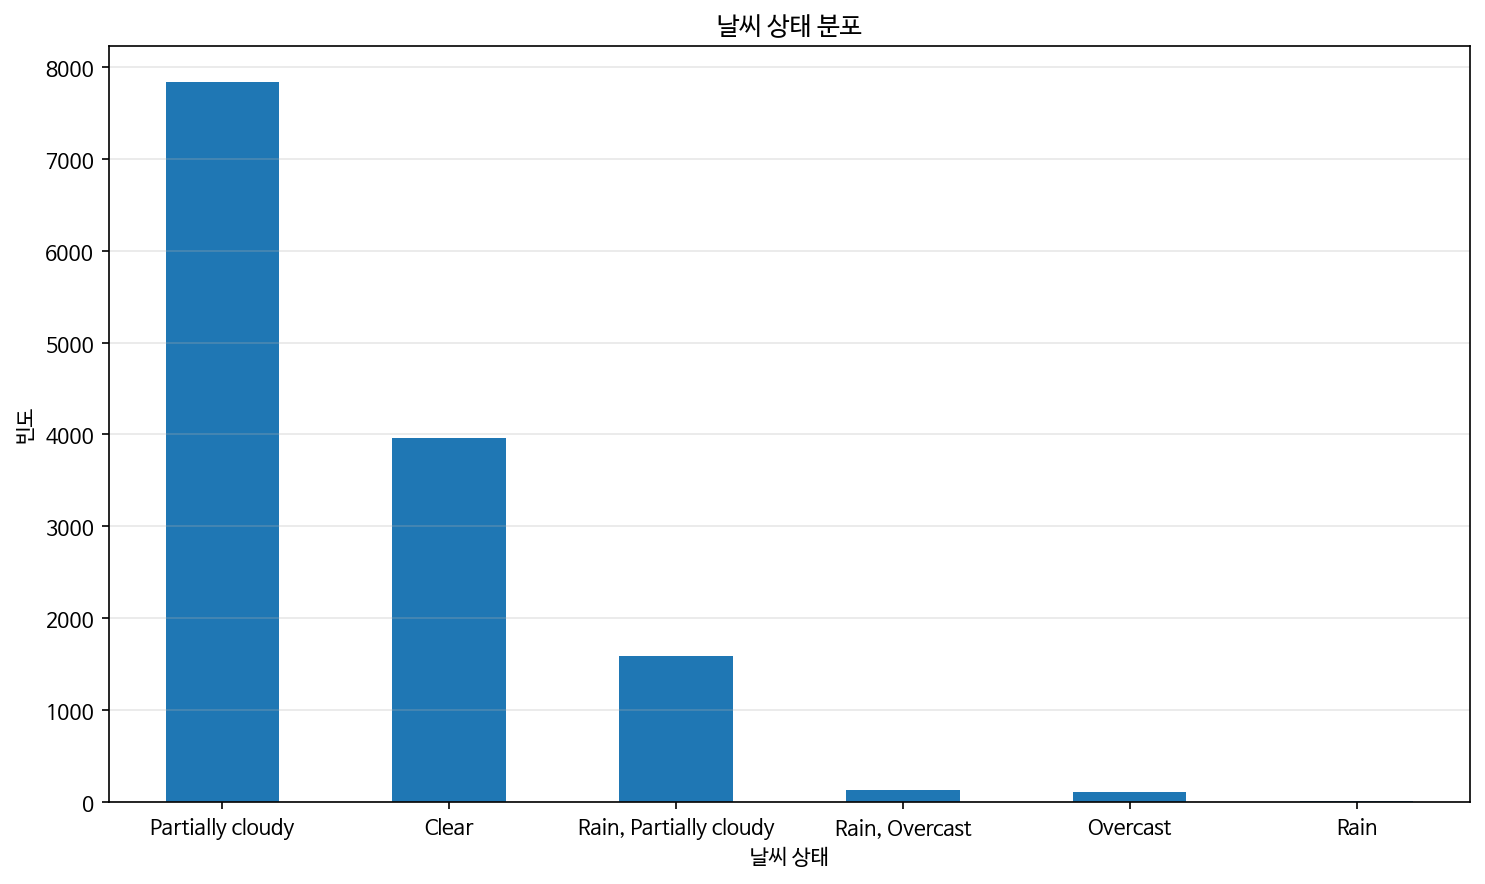

In [ ]:
# 날씨 상태별 발생 빈도 계산
condition_counts = df['conditions'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 6))
condition_counts.plot(kind='bar')
plt.title('날씨 상태 분포')
plt.xlabel('날씨 상태')
plt.ylabel('빈도')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

우선 데이터셋의 전체적인 날씨 상태를 막대 그래프로 표현했다.

In [ ]:
# 날씨 상태 통합
df['conditions'] = df['conditions'].replace({'Rain': 'Rainy',
                                             'Rain, Overcast': 'Rainy',
                                             'Rain, Partially cloudy': 'Rainy'})


비가 오는 날의 상태가 'Rain' + 'Overcast', 'Partially cloudy'와 같이 따로 분할되어 있기 때문에 비가 오는 빈도를 보기 위해 Rain이 포함된 날씨 상태를 'Rainy'로 통합하였다.

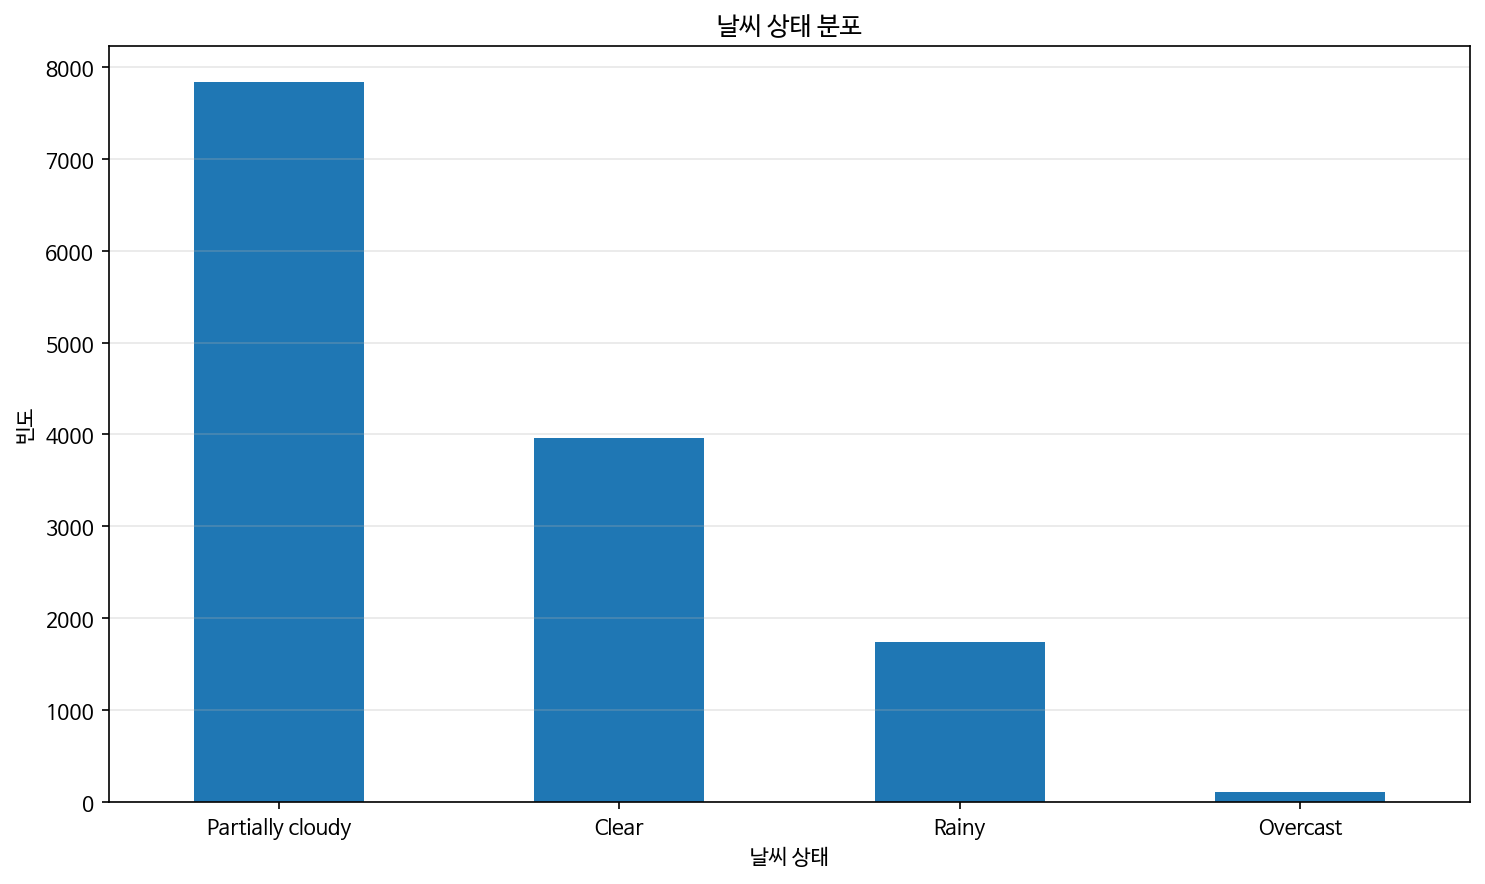

In [ ]:
# 날씨 상태별 발생 빈도 계산
condition_counts = df['conditions'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 6))
condition_counts.plot(kind='bar')
plt.title('날씨 상태 분포')
plt.xlabel('날씨 상태')
plt.ylabel('빈도')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

비 오는 상태를 Rainy로 통합한 후의 막대 그래프다.

전체 데이터를 합산한 그래프이기 때문에 도시별로 볼 수 있도록 바꿔야한다.

<Figure size 2720x1700 with 0 Axes>

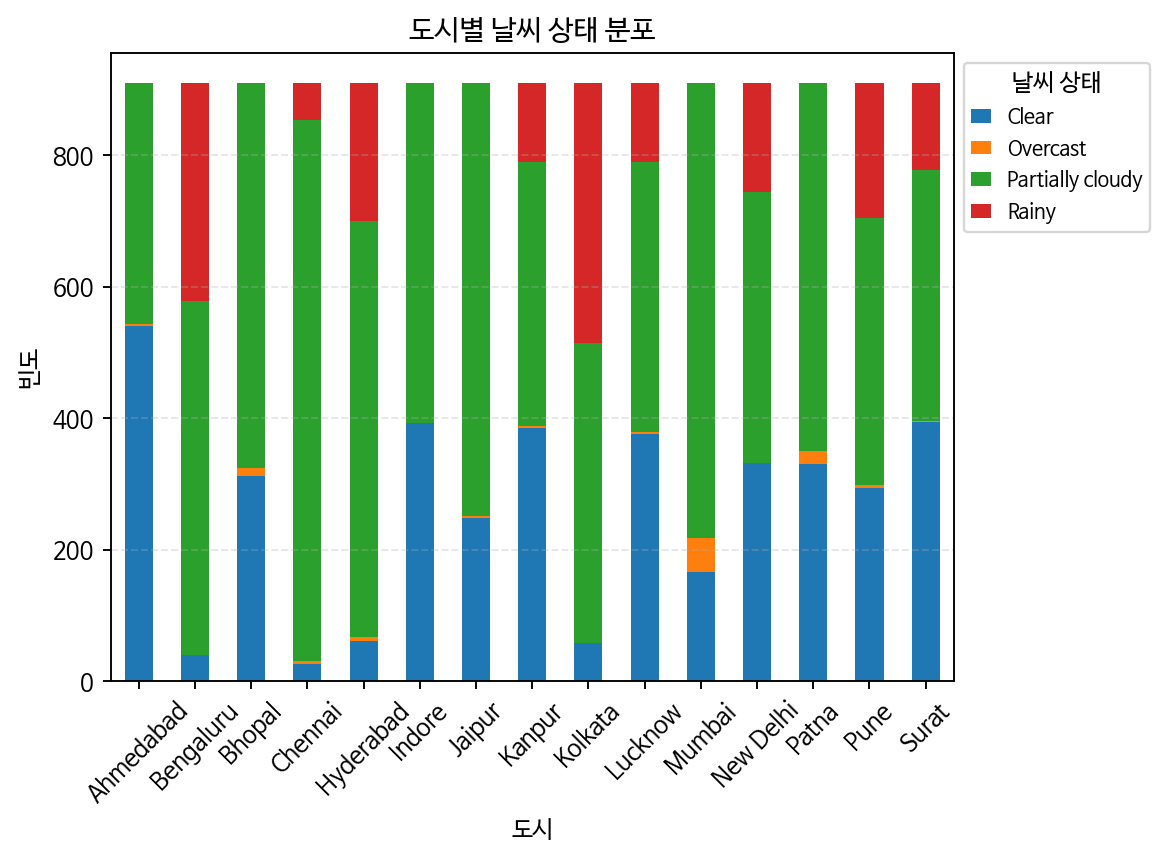

In [ ]:
# 그래프 해상도 변경
plt.rcParams['figure.dpi'] = 170

# 도시별 날씨 상태 분포 계산
city_condition_counts = df.groupby(['City', 'conditions']).size().unstack(fill_value=0)

# 그래프 그리기
plt.figure(figsize=(16, 10))
city_condition_counts.plot(kind='bar', stacked=True)
plt.title('도시별 날씨 상태 분포')
plt.xlabel('도시')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.legend(title='날씨 상태', bbox_to_anchor=(1,1), loc='upper left', handlelength=1, fontsize='small')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

각 도시별 날씨 상태를 누적 막대 그래프로 표현했다.
비가 거의 오지 않는 도시도 있고, 전체 일수의 30% 이상 비가 오는 도시도 확인할 수 있다.

데이터셋의 기간인 4~6월 동안 비가 오지 않는 도시의 경우 야외 활동을 더 적극적으로 할 수 있기 때문에 야외에서 즐기는 스포츠나 레저 활동, 행사, 콘서트 등을 더 많이 배치하여 진행할 수 있다.

반대로 비가 많이 오는 도시의 경우 우산과 우비 등의 우천 용품 판매를 촉진하고 야외보단 실내에서 활동하는 행사들을 배치해야 한다.

하지만 이 그래프로는 시계열을 확인할 수 없기 때문에 정확한 행사 진행 및 마케팅이 힘들다.

<Figure size 2720x1700 with 0 Axes>

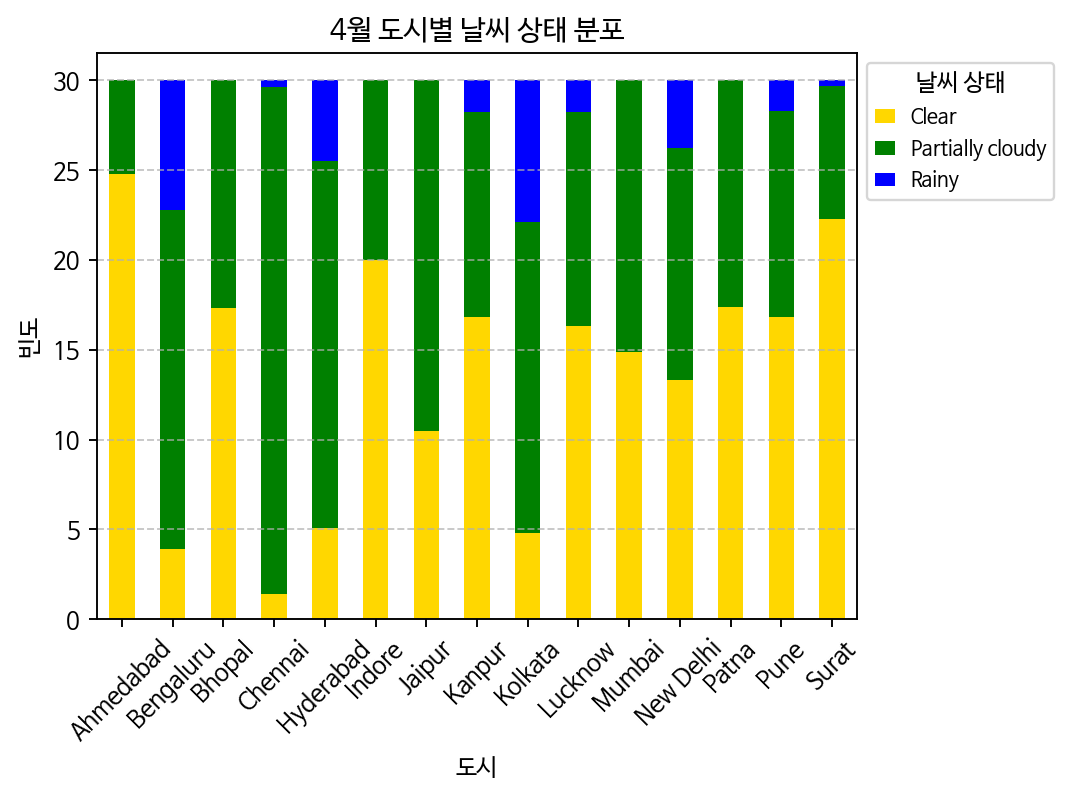

<Figure size 2720x1700 with 0 Axes>

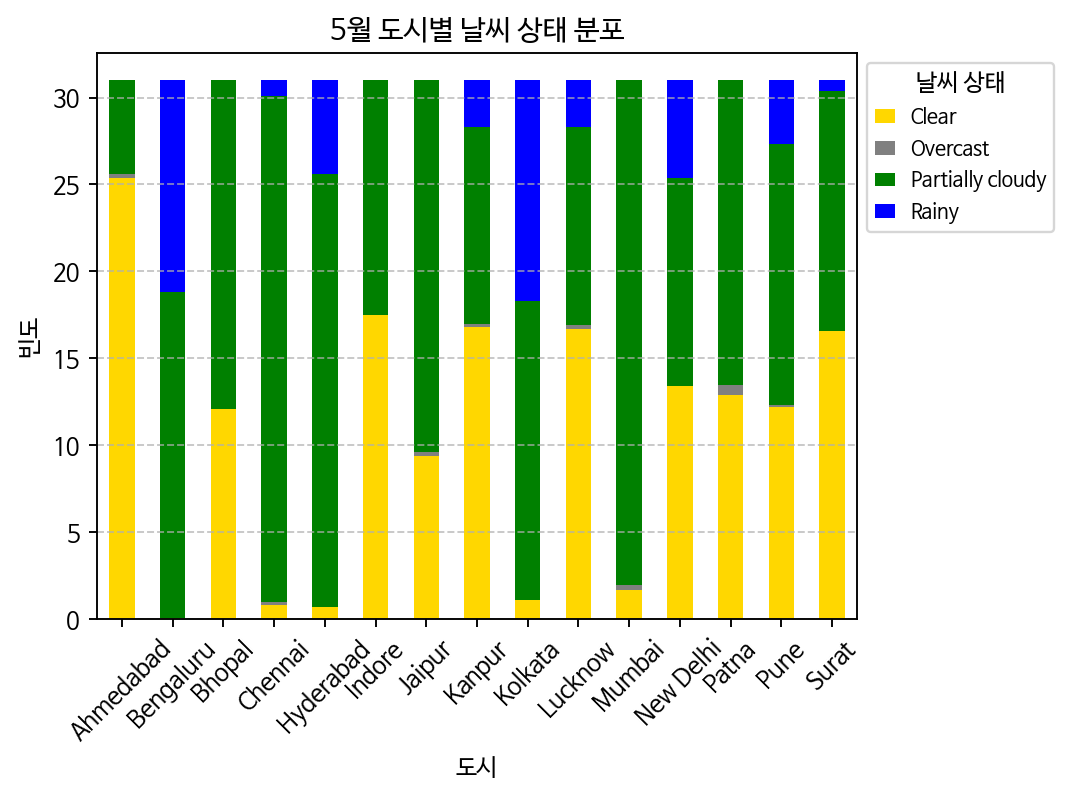

<Figure size 2720x1700 with 0 Axes>

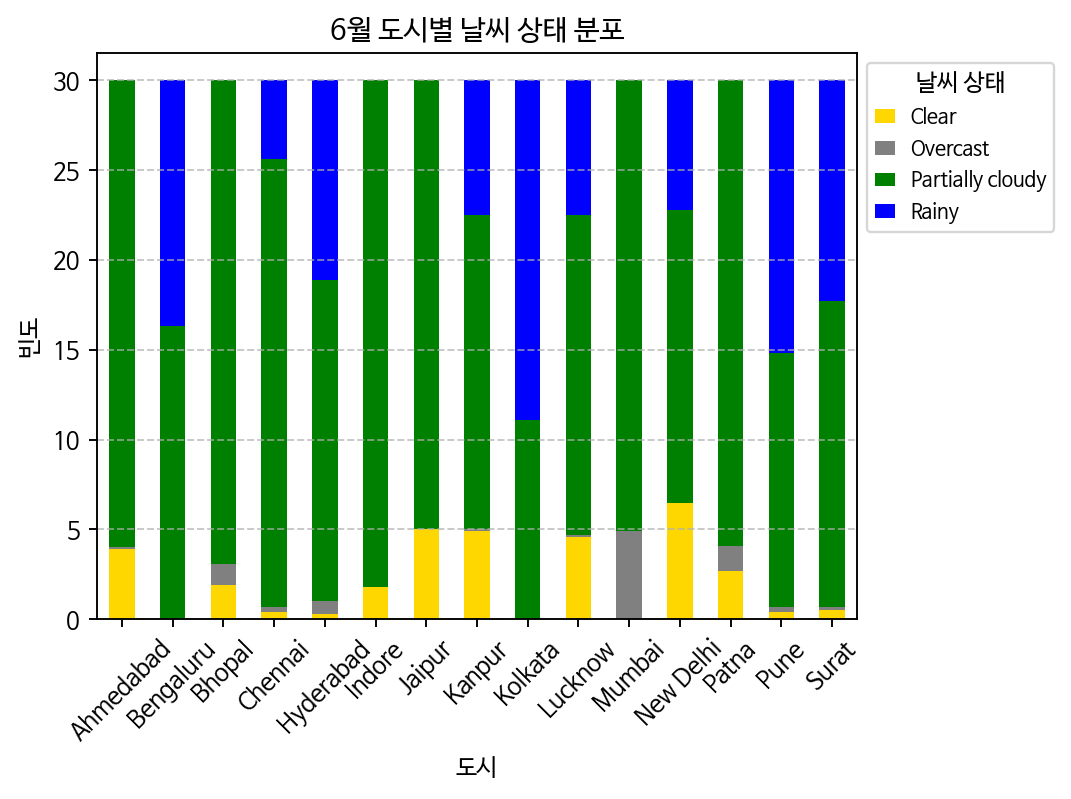

In [ ]:
# Date 열에서 월 정보를 추출하여 새로운 열 추가
df['Month'] = df['Date'].dt.month

# 월별로 데이터를 필터링하여 시각화
months = [4, 5, 6]
colors = {'Clear': 'gold', 'Partially cloudy': 'green', 'Overcast' : 'gray','Rainy': 'blue'}
for month in months:
    plt.figure(figsize=(16, 10))
    month_data = df[df['Month'] == month]
    city_condition_counts = month_data.groupby(['City', 'conditions']).size().unstack(fill_value=0)/10
    city_condition_counts.plot(kind='bar', stacked=True, color=[colors[col] for col in city_condition_counts.columns])
    plt.title(f'{month}월 도시별 날씨 상태 분포')
    plt.xlabel('도시')
    plt.ylabel('빈도')
    plt.xticks(rotation=45)
    plt.legend(title='날씨 상태', bbox_to_anchor=(1,1), loc='upper left', handlelength=1, fontsize='small')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


월별로 누적 막대 그래프를 그려 3개의 그래프를 생성했다.

그래프가 3개라서 월별로 우천 빈도가 높아지는지 한 눈에 확인하기 힘들다.

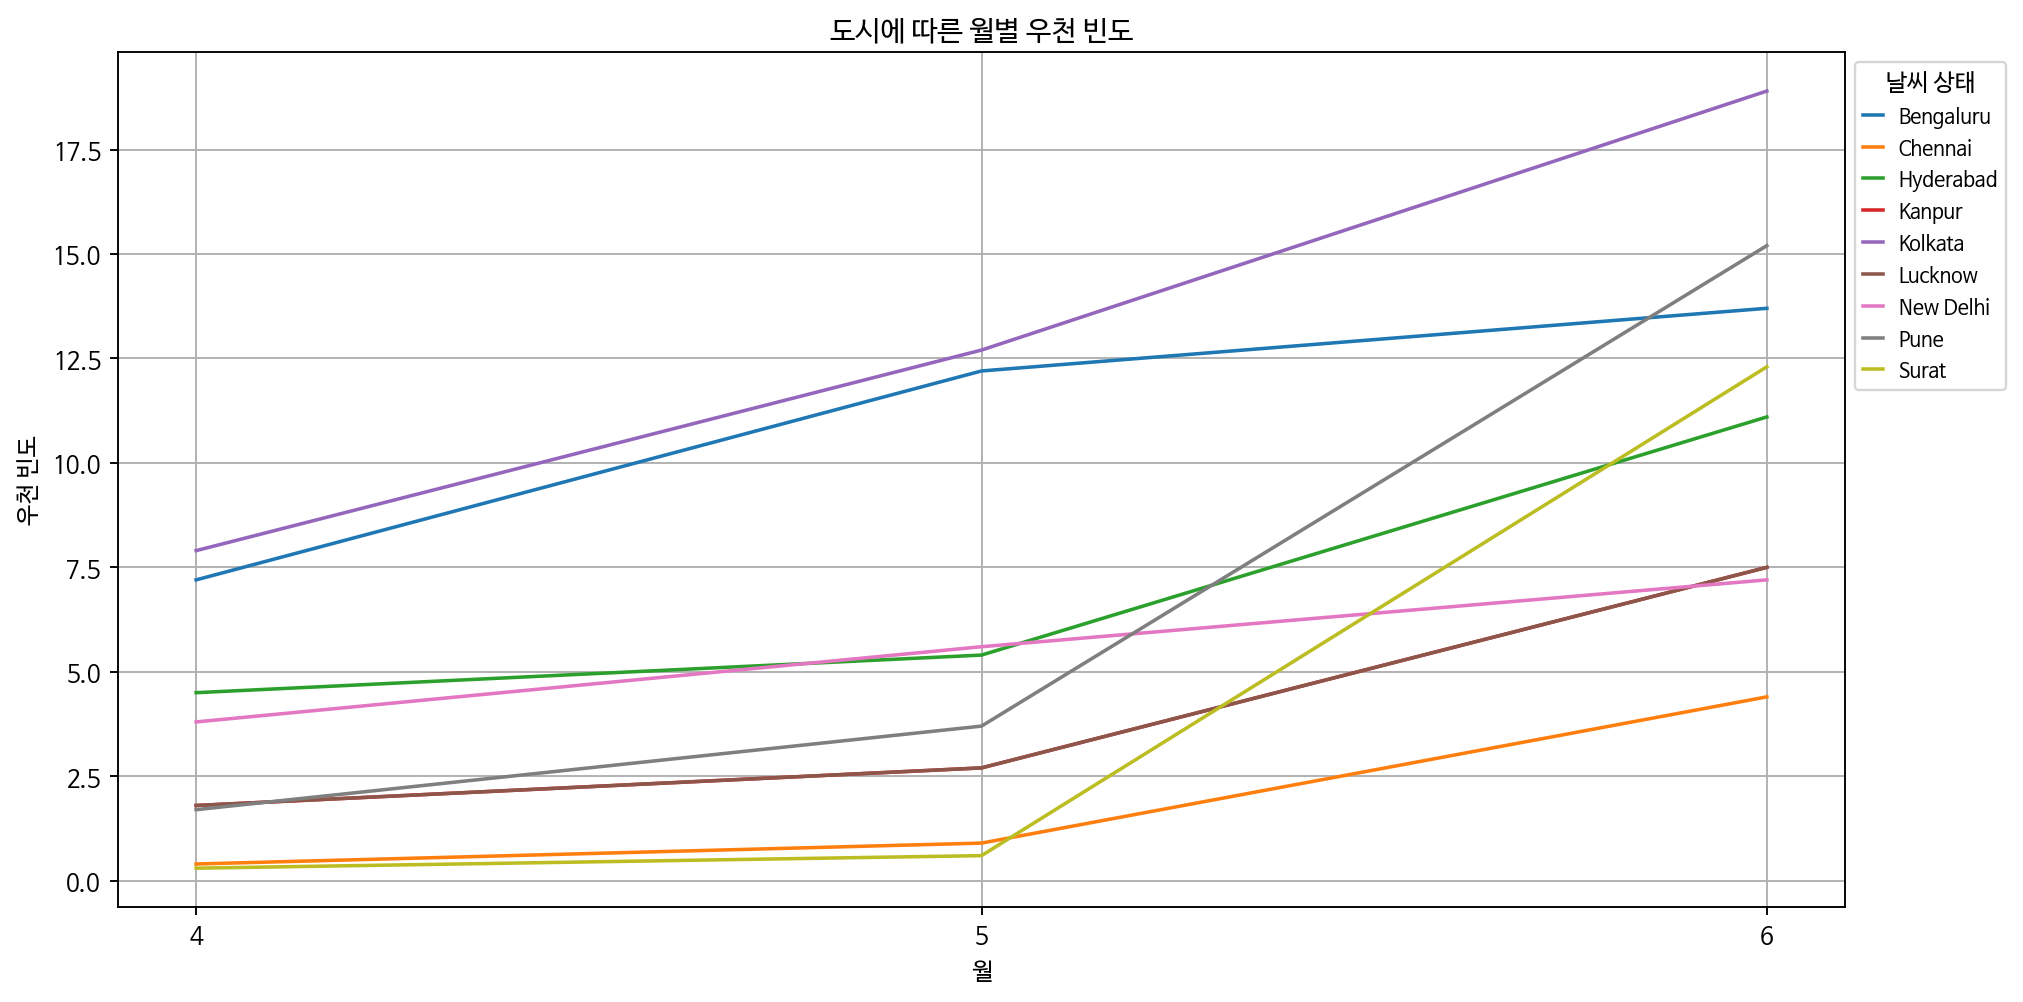

In [ ]:
# 비가 오는 날의 조건 설정
rainy_days = df[df['conditions'] == 'Rainy']

# 도시에 따른 월별 우천 빈도 계산
city_monthly_rainy_days = rainy_days.groupby(['City', rainy_days['Date'].dt.month])['Date'].count().unstack()/10

# 시각화
plt.figure(figsize=(12, 6))
for city in city_monthly_rainy_days.index:
    plt.plot(city_monthly_rainy_days.columns, city_monthly_rainy_days.loc[city], label=city)

plt.title('도시에 따른 월별 우천 빈도')
plt.xlabel('월')
plt.ylabel('우천 빈도')
plt.xticks(city_monthly_rainy_days.columns)
plt.legend(title='날씨 상태', bbox_to_anchor=(1,1), loc='upper left', handlelength=1, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


꺾은선 그래프를 통해 몇 월에 비가 더 많이 오는지를 확인했다. 비가 오지 않은 도시는 제외시켜 더 보기 편한 그래프를 생성했다.

비가 오는 모든 도시에서 4월에서 6월로 갈 수록 비가 더 많이 온다는 것을 확인할 수 있다. 그만큼 6월에 우천 용품들의 수요가 더 많아지며, 실내활동이 늘어날 것을 예측할 수 있다.

Kolkata와 Bengaluru는 4~6월간 꾸준히 비가 많이 오기 때문에 우천 용품 수요가 가장 많을 것이다.

Surat과 Pune은 6월에 우천 빈도가 급증하기 때문에 전월에 비해 우천 용품 수요가 급증할 것이다.

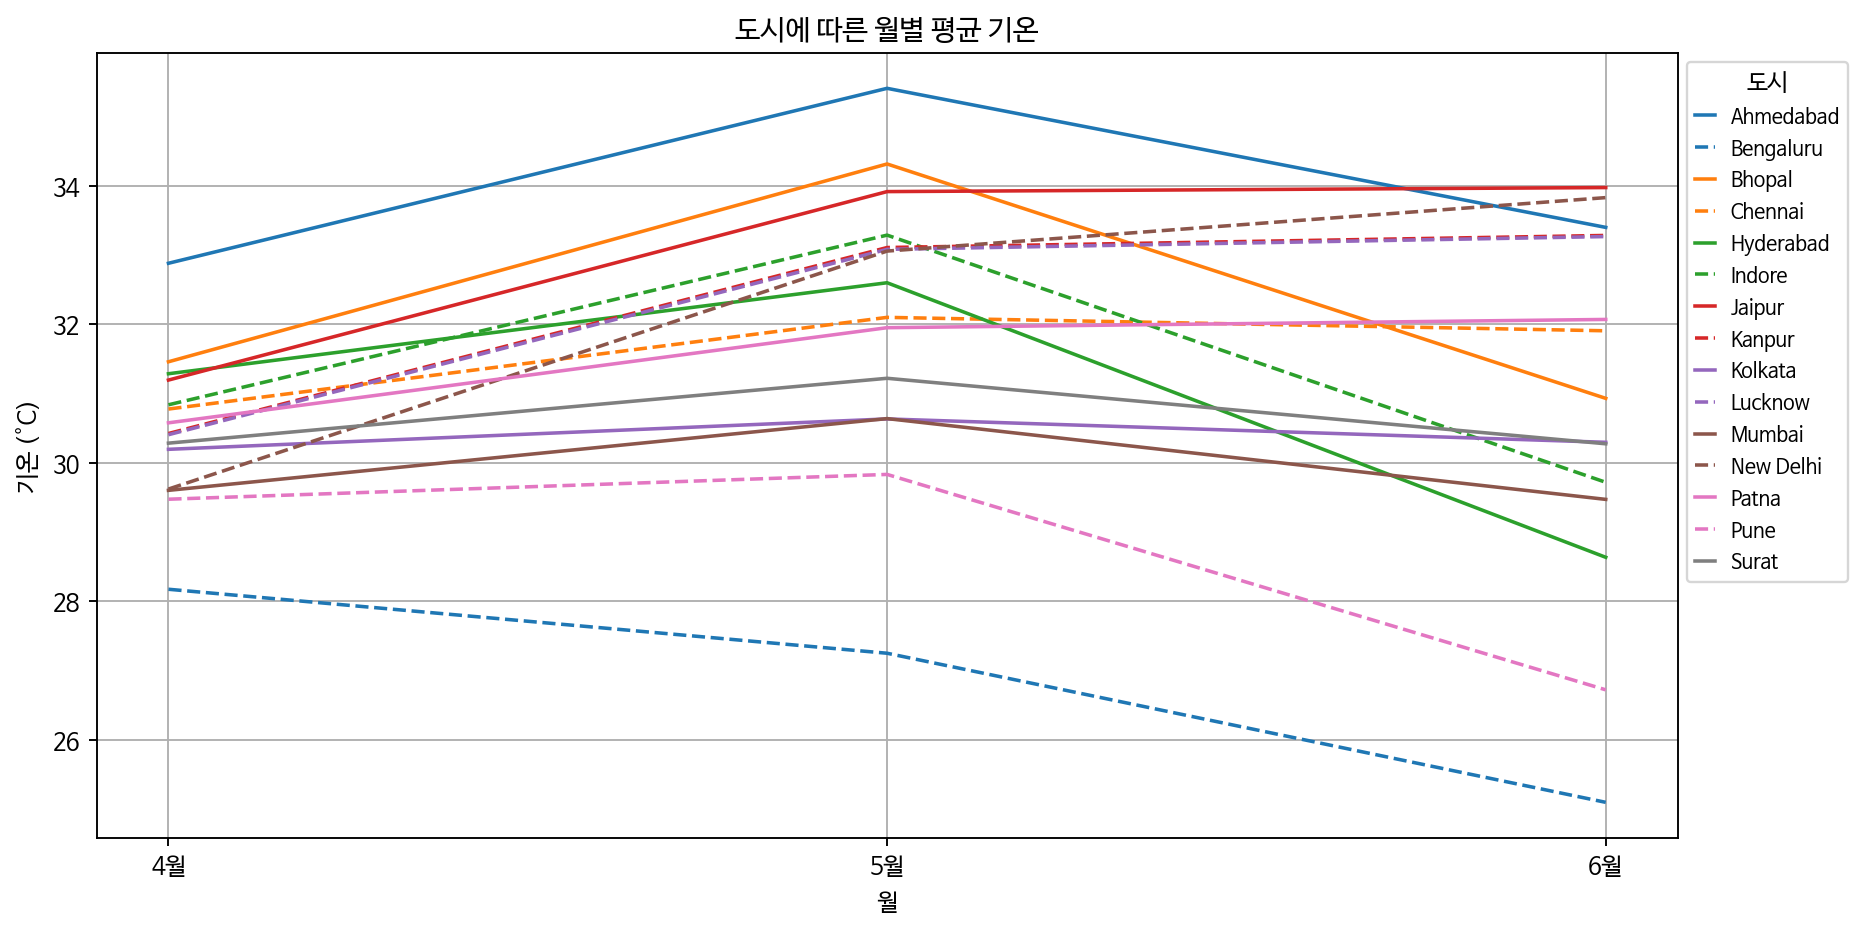

In [ ]:
# 도시에 따른 월별 평균 기온 계산
city_monthly_temp = df.groupby(['City', 'Month'])['temp'].mean()

# 시각화
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors
line_styles = ['-', '--']
for i, city in enumerate(city_monthly_temp.index.get_level_values('City').unique()):
    city_data = city_monthly_temp.loc[city]
    color = colors[i // 2 % len(colors)]  # 2번째마다 다음 색상으로 변경
    line_style = line_styles[i % len(line_styles)]  # 짝수면 실선, 홀수면 점선
    plt.plot(city_data.index.map({4: '4월', 5: '5월', 6: '6월'}), city_data.values, label=city, linestyle=line_style, color=color)

plt.title('도시에 따른 월별 평균 기온')
plt.xlabel('월')
plt.ylabel('기온 (°C)')
plt.grid(True)
plt.legend(title='도시', bbox_to_anchor=(1,1), loc='upper left', handlelength=1, fontsize='small')
plt.show()


몇몇의 도시를 제외한 대부분의 도시들이 5월에 평균 기온이 가장 높고 6월에 갈 수록 낮아지기 때문에 선풍기나 에어컨 같은 냉방 제품이나 여름 의류, 물과 찬 음식등의 수요 시기가 한국과 다르다는 것을 생각해야한다.

Ahmedabad가 폭염 대비 용품에 대한 수요가 가장 많을 것으로 보이며, Bengaluru는 다른 도시들에 비해 상대적으로 기온이 낮기 때문에 수요가 적을 것으로 보인다.

검색을 통해 한국은 7~ 8월이 가장 더운 시기지만 인도는 5~ 6월이 가장 더운 시기라는 것을 알게 되었다.

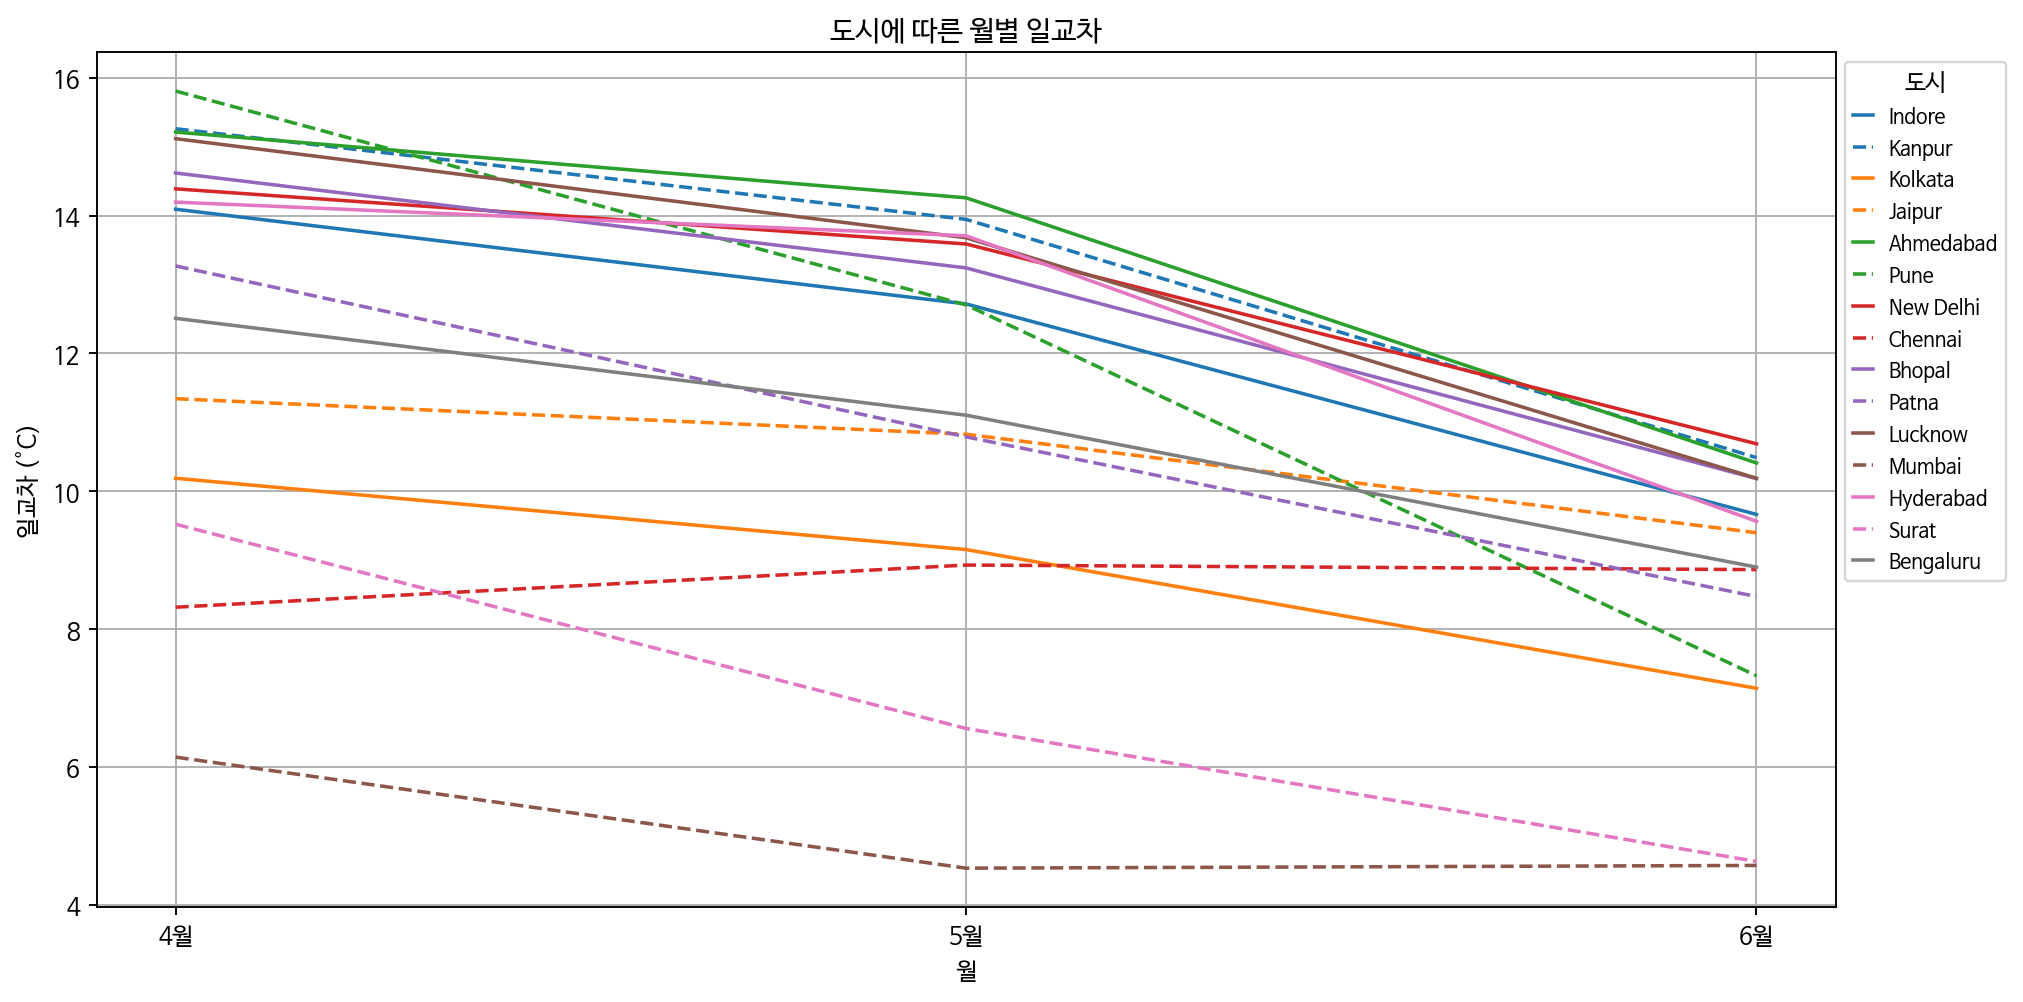

In [ ]:
# 도시별 일교차 계산
df['Temp_Difference'] = df['tempmax'] - df['tempmin']

# 시각화
plt.figure(figsize=(12, 6))
for i, city in enumerate(df['City'].unique()):
    city_data = df[df['City'] == city]
    monthly_data = city_data.groupby(city_data['Date'].dt.month)['Temp_Difference'].mean()
    color = colors[i // 2 % len(colors)]
    line_style = line_styles[i % len(line_styles)]
    plt.plot(monthly_data.index, monthly_data.values, label=city, linestyle=line_style, color=color)

plt.title('도시에 따른 월별 일교차')
plt.xlabel('월')
plt.ylabel('일교차 (°C)')
plt.xticks([4, 5, 6], ['4월', '5월', '6월'])
plt.legend(title='도시', bbox_to_anchor=(1,1), loc='upper left', handlelength=1, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


그래프에서 4~5월에 일교차가 큰 도시들은 일기 예보를 할 때 겉옷을 챙겨야 한다는 내용이 들어가면 좋을 것이며, 겉옷들을 판매하기 좋은 시기라고 본다.

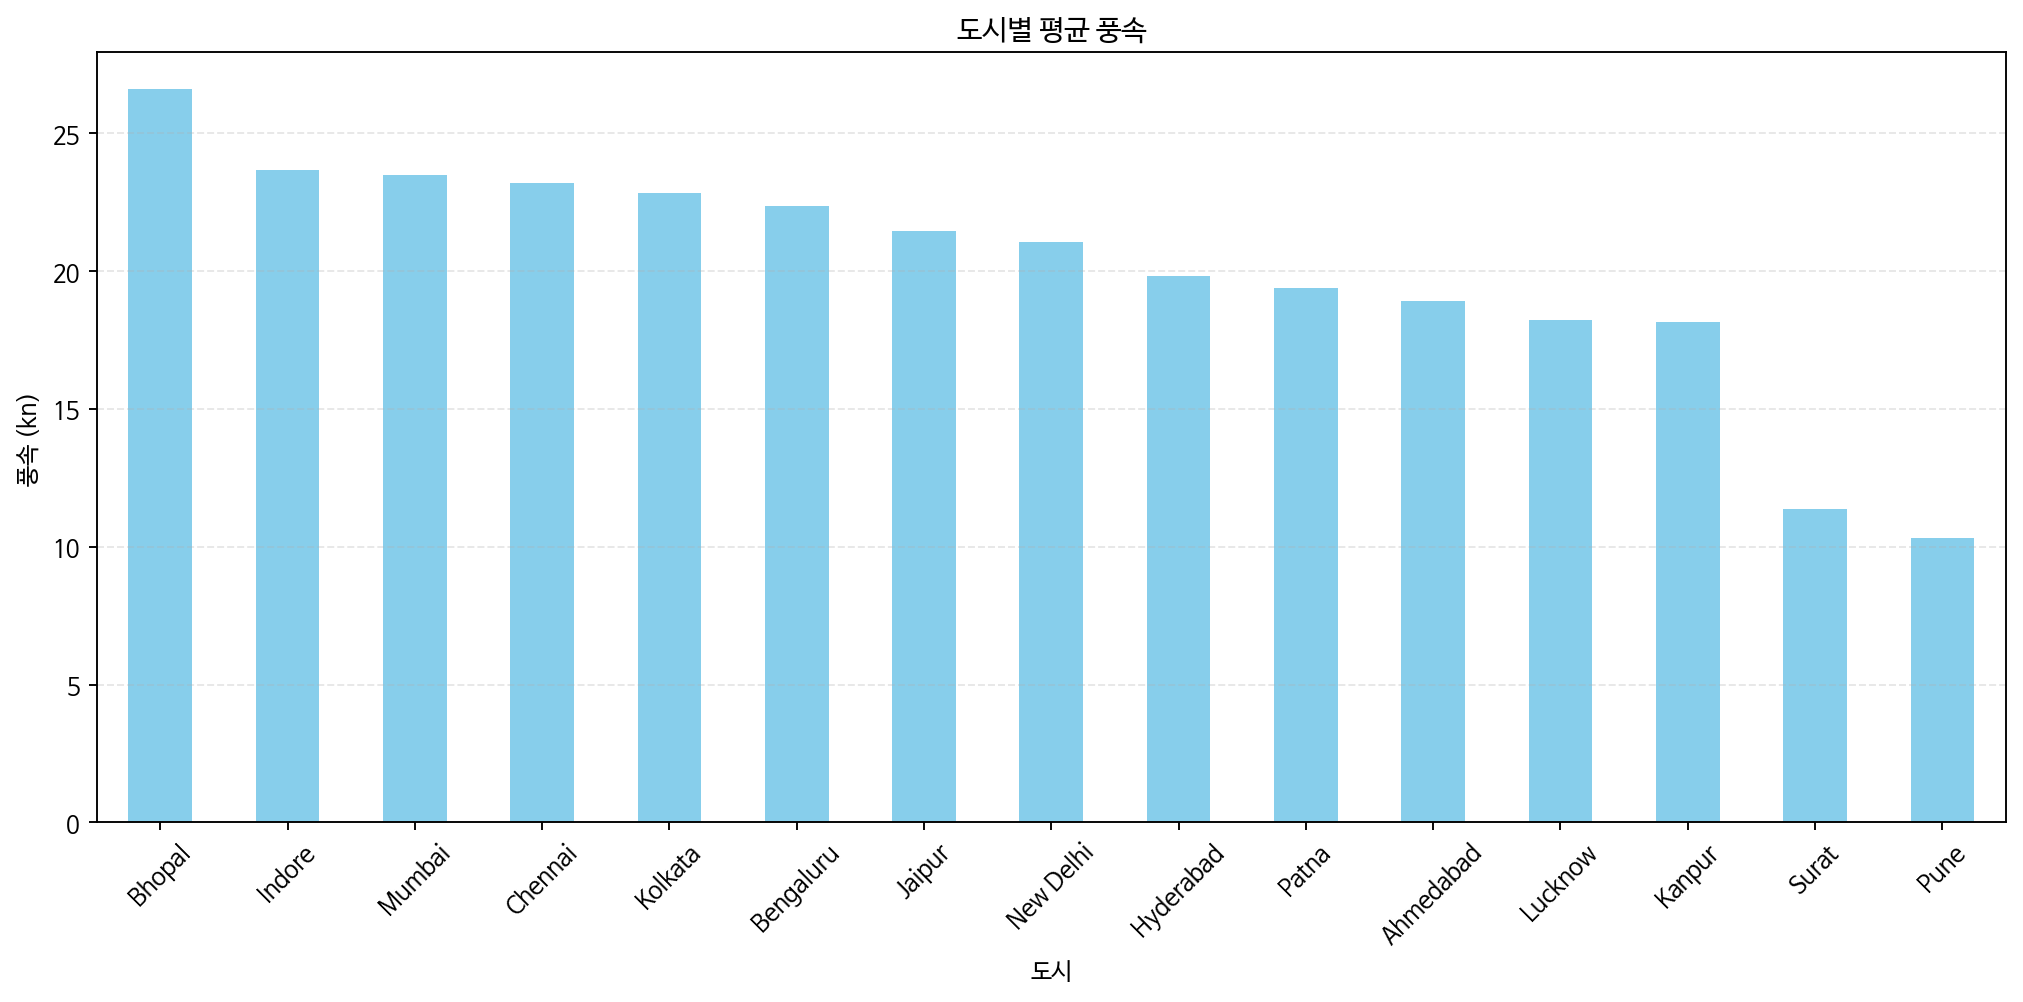

In [ ]:
# 도시별 평균 풍속 계산
city_wind_speed = df.groupby('City')['windspeed'].mean()

# 내림차순 정렬
city_wind_speed = city_wind_speed.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
city_wind_speed.plot(kind='bar', color='skyblue')
plt.title('도시별 평균 풍속')
plt.xlabel('도시')
plt.ylabel('풍속 (kn)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

도시별로 평균 풍속이 다르기 때문에 위 그래프를 보고 어느 도시에 풍력 발전기를 설치해야 더 효율적일지 생각할 수 있다.

위 그래프를 봤을때 Bhopal이 가장 효율적일 것으로 보인다.

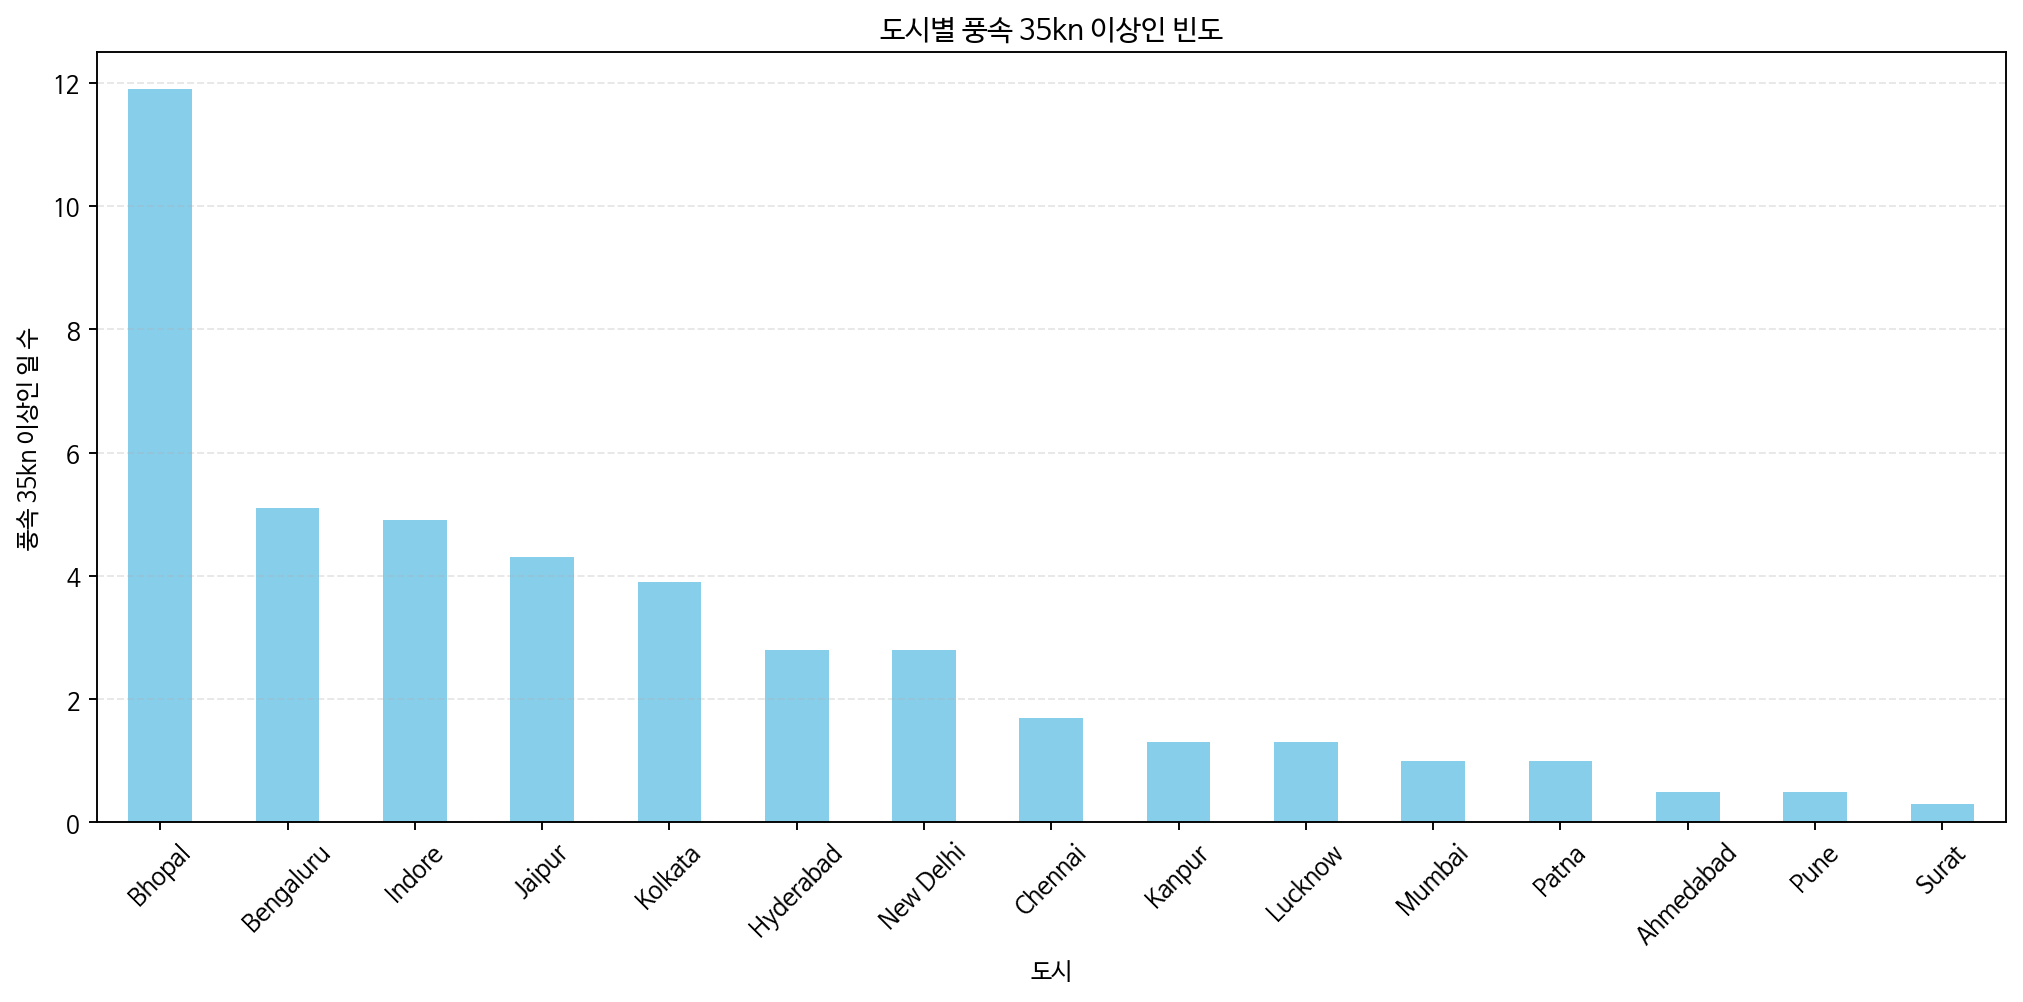

In [ ]:
# 풍속이 35kn 이상인 데이터 필터링
wind_speed_35 = df[df['windspeed'] > 35]

# 도시별로 데이터 그룹화하여 풍속이 35kn 이상인 빈도 계산
city_wind_speed_35 = wind_speed_35.groupby('City')['windspeed'].count().sort_values(ascending=False)/10

# 시각화
plt.figure(figsize=(12, 6))
city_wind_speed_35.plot(kind='bar', color='skyblue')
plt.title('도시별 풍속 35kn 이상인 빈도')
plt.xlabel('도시')
plt.ylabel('풍속 35kn 이상인 일 수')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

풍속이 35노트가 넘어가면 비행기가 결항된다.

Bhopal은 4~6월 3개월간 풍속이 35노트가 넘는 날이 평균적으로 12일 정도가 되기 때문에 공항이 있다면 다른 도시보다 비행기가 결항되는 날이 많을 것이다.

이처럼 풍속이 35kn를 넘는 날이 많은 도시들은 비행기가 결항되었을 때의 고객 만족을 위해 결항에 대한 보상 및 환불 정책을 더 확실히 수립해야 할 것이고, 고객 대응 팀의 배치가 추가적으로 필요할 것이라 생각한다.

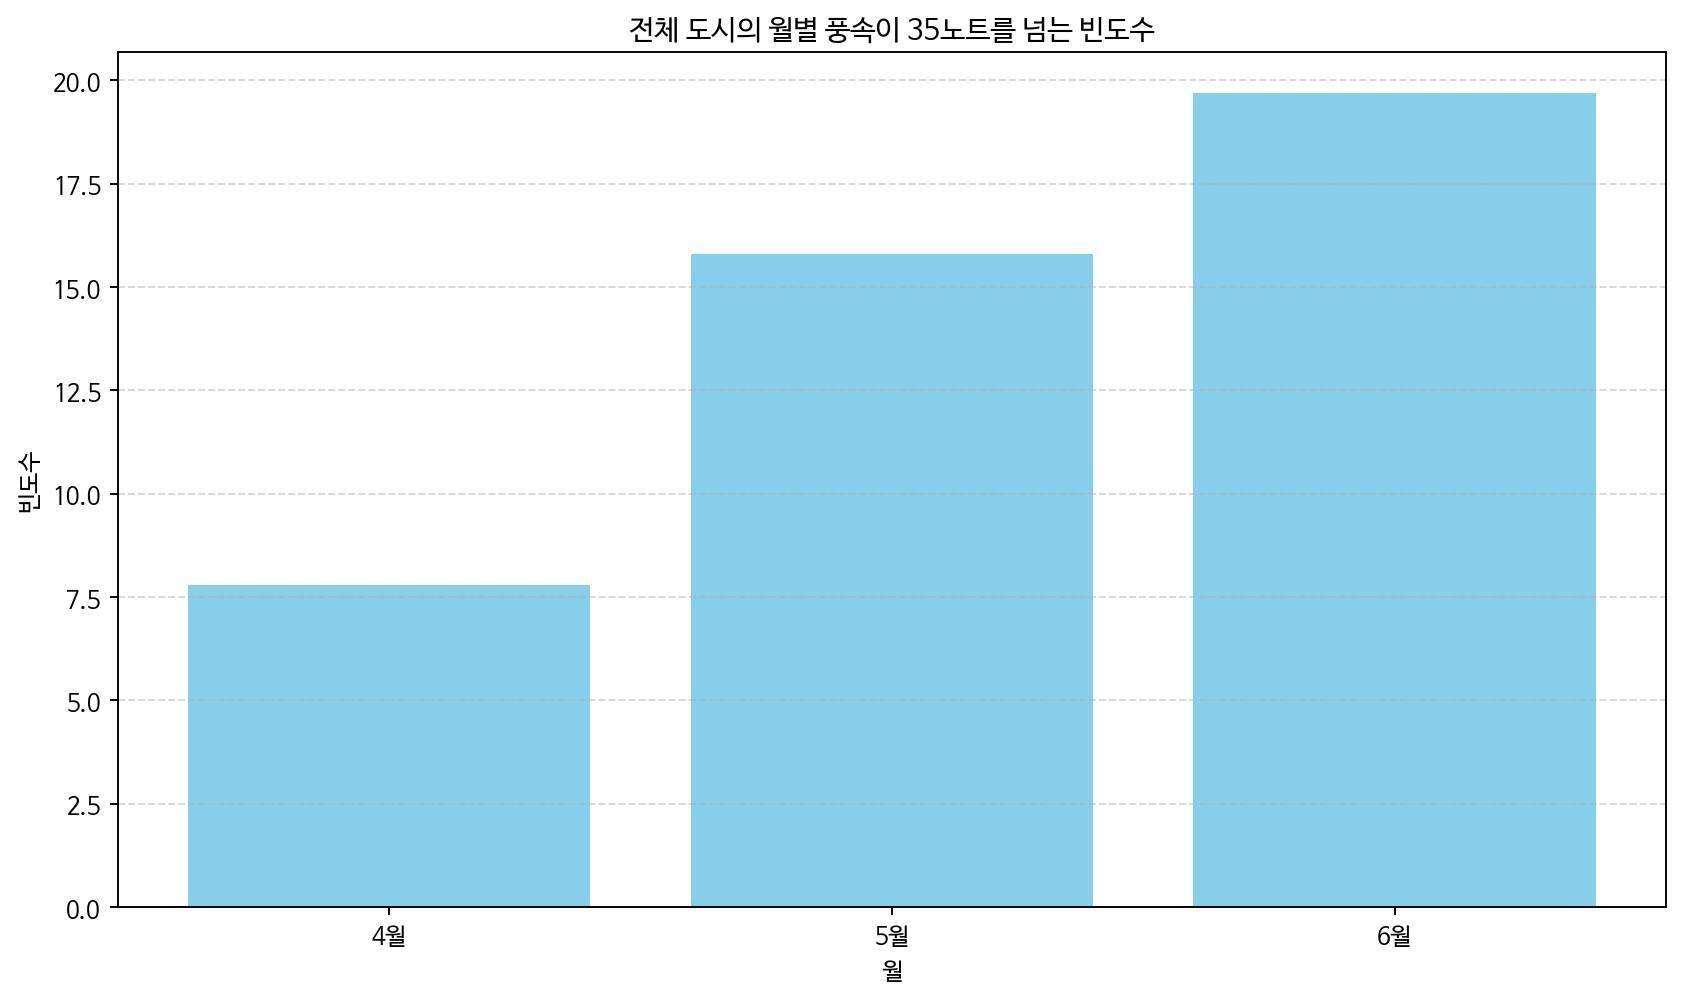

In [ ]:
# 월별로 그룹화하여 빈도수 계산
monthly_wind_speed_35 = wind_speed_35.groupby('Month').size()/10

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(monthly_wind_speed_35.index, monthly_wind_speed_35.values, color='skyblue')
plt.title('전체 도시의 월별 풍속이 35노트를 넘는 빈도수')
plt.xlabel('월')
plt.ylabel('빈도수')
plt.xticks([4, 5, 6], ['4월', '5월', '6월'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

4월보다 5~6월에 35노트 이상인 빈도수가 많기 때문에 상대적으로 비행기가 결항될 가능성이 높다.

이 데이터셋의 기간에서 봤을 때 공항에서는 5~6월간 고객 대응 팀이 추가적으로 필요할 것이다.

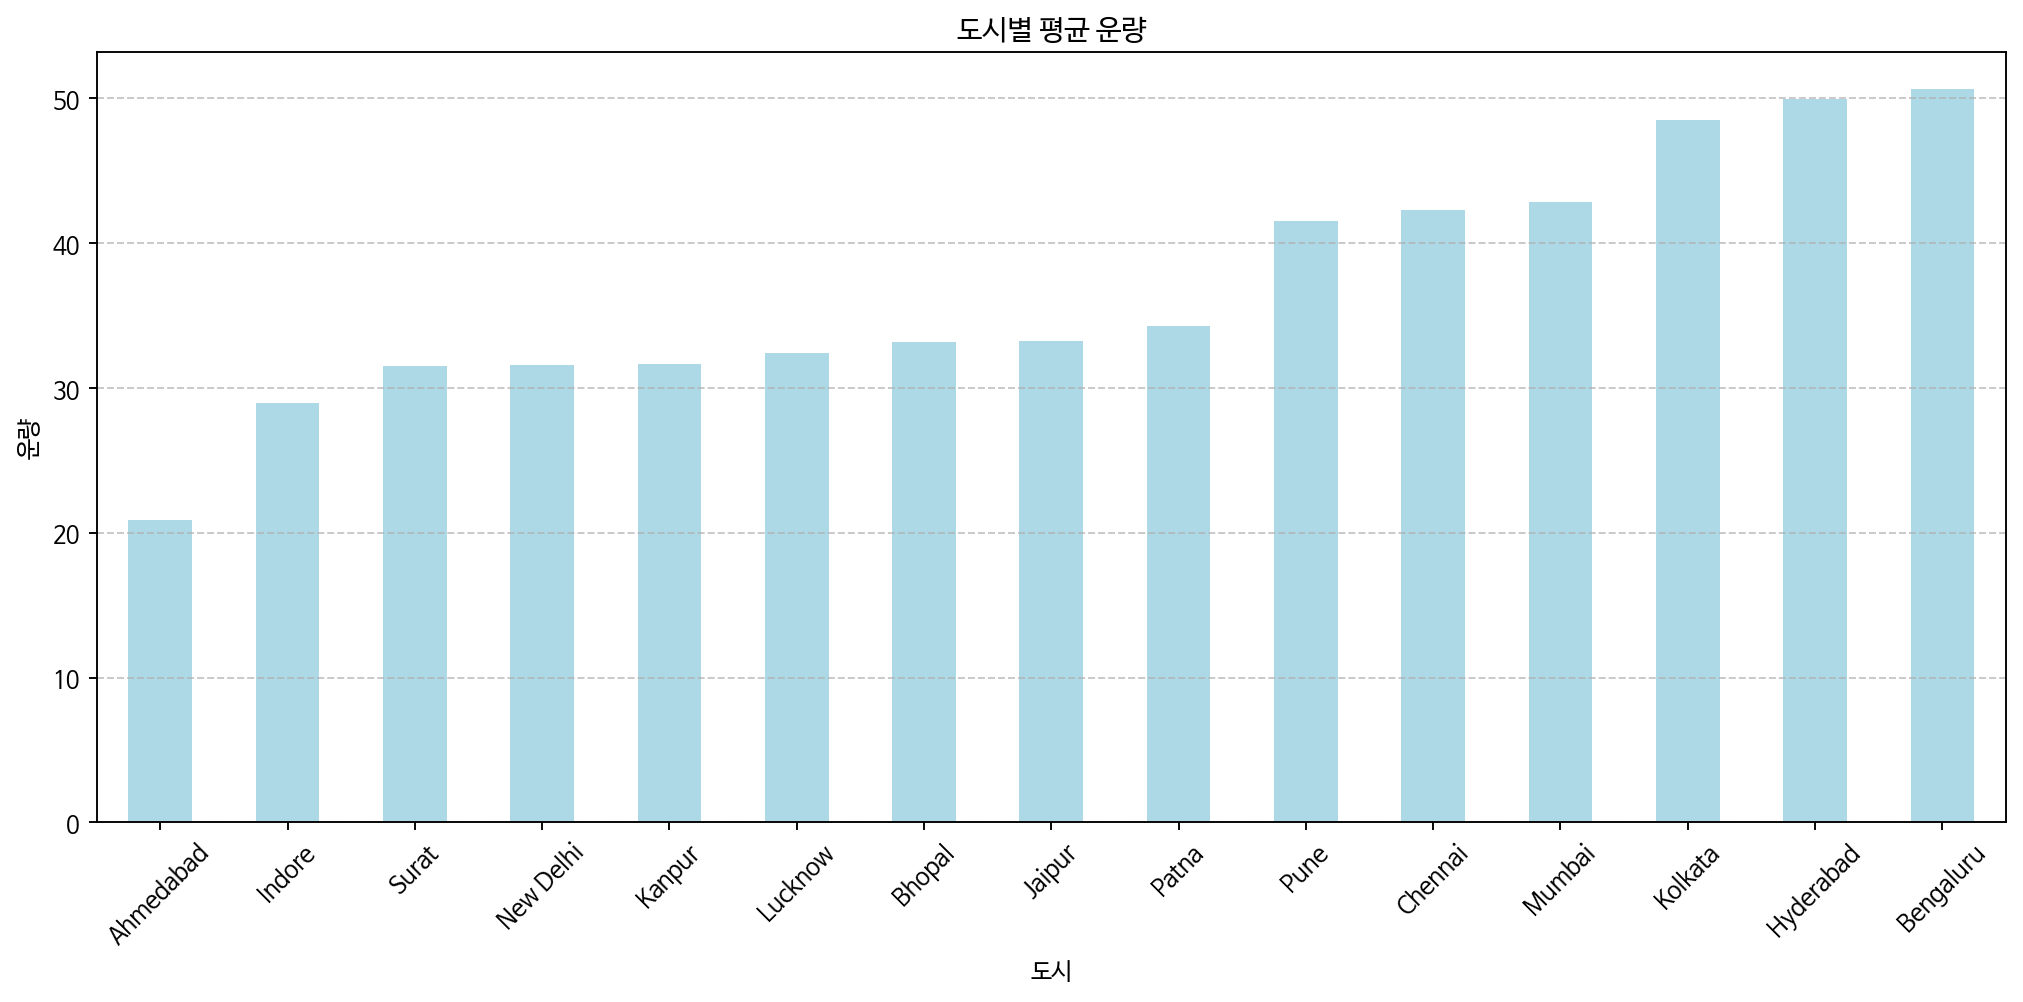

In [ ]:
# 도시별 평균 운량 계산
city_cloud_cover = df.groupby('City')['cloudcover'].mean()

# 운량을 오름차순으로 정렬
city_cloud_cover = city_cloud_cover.sort_values(ascending=True)

# 시각화
plt.figure(figsize=(12, 6))
city_cloud_cover.plot(kind='bar', color='lightblue')
plt.title('도시별 평균 운량')
plt.xlabel('도시')
plt.ylabel('운량')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


도시별로 운량이 다르므로 태양광 발전기를 설치할 때 위 그래프를 보고 어느 도시에 설치해야 효율적일지 생각할 수 있다.

위 그래프 상 Ahmedabad가 가장 효율적으로 보인다.

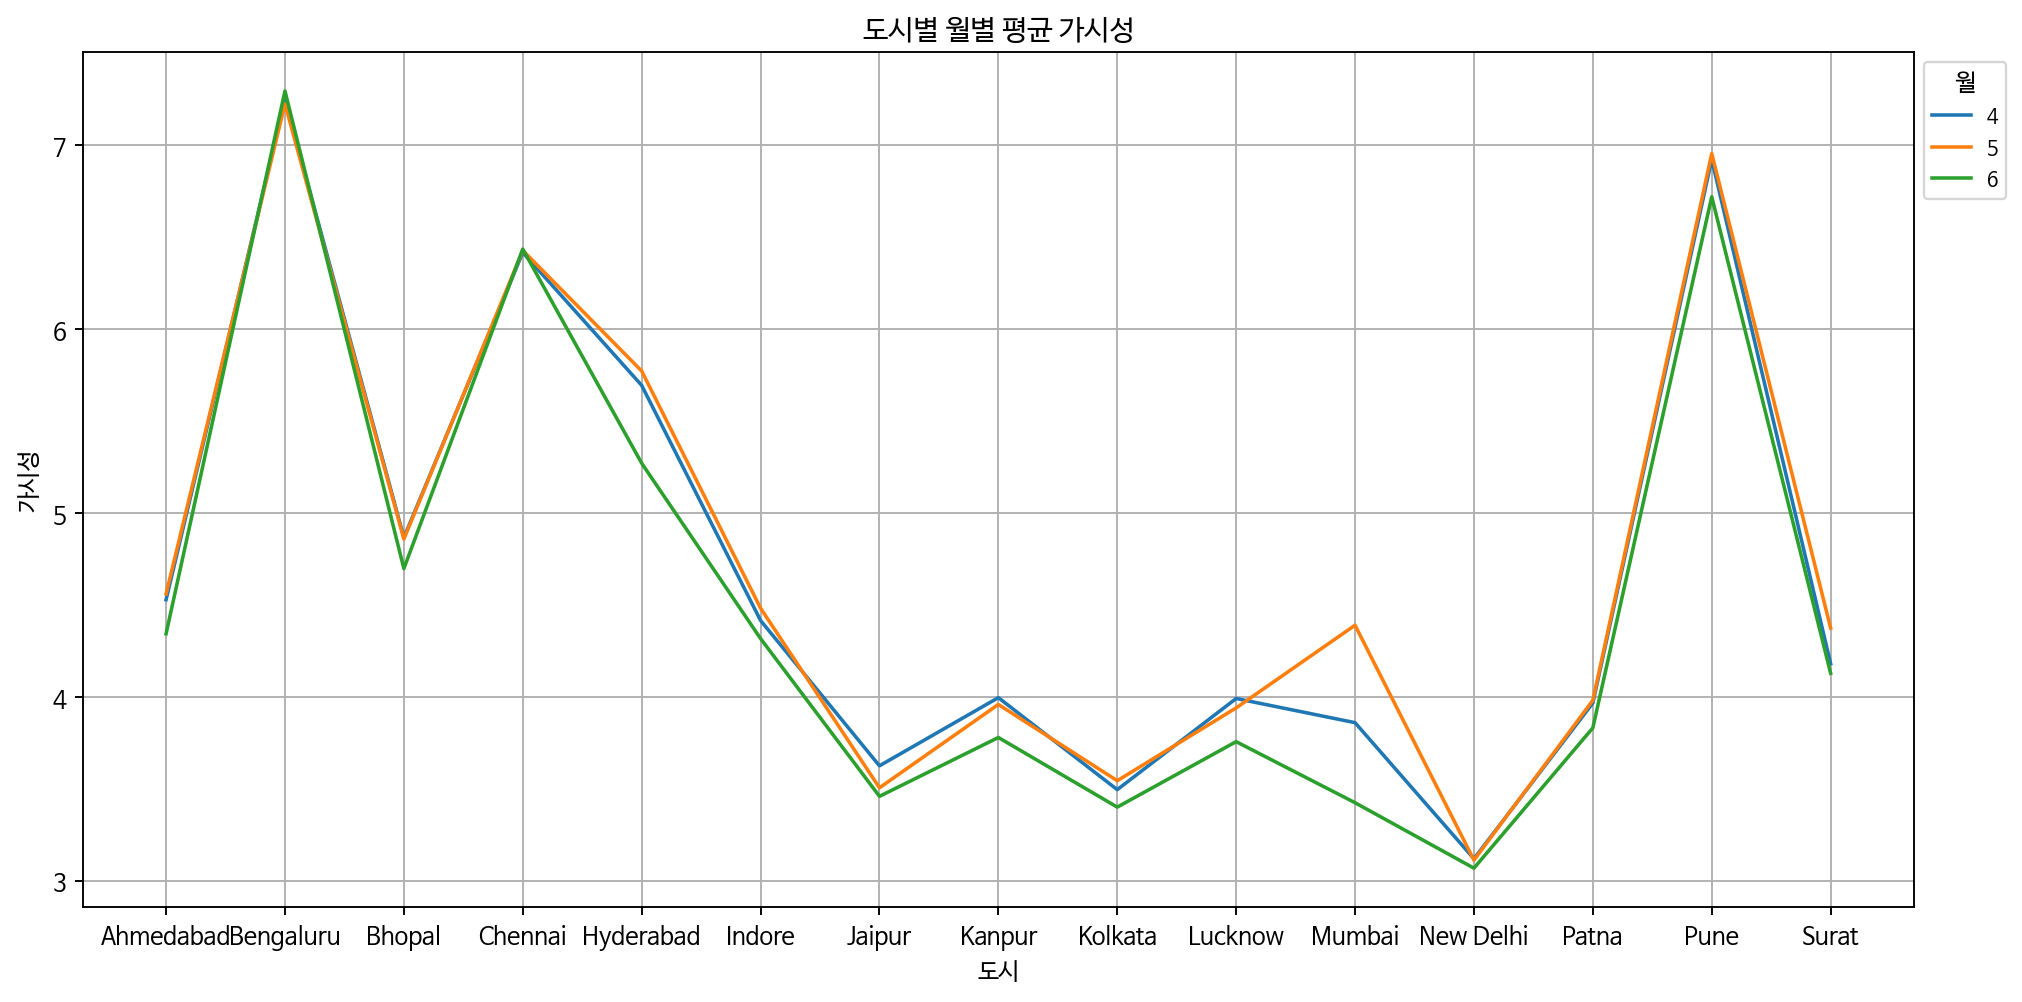

In [ ]:
# 도시별 월별 평균 가시성 계산
city_monthly_visibility = df.groupby(['City', 'Month'])['visibility'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 6))
for city in city_monthly_visibility.columns:
    plt.plot(city_monthly_visibility.index, city_monthly_visibility[city], label=city)

plt.title('도시별 월별 평균 가시성')
plt.xlabel('도시')
plt.ylabel('가시성')
plt.legend(title='월', bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


도시별로 월마다 가시성이 얼마나 차이나는지 확인해봤지만 월별 차이는 유의미한 차이는 없는 것으로 보인다
Mumbai의 경우 Overcast, 흐린 날이 6월에 상대적으로 많았기 때문에 가시성에 차이가 있는 것으로 보인다.

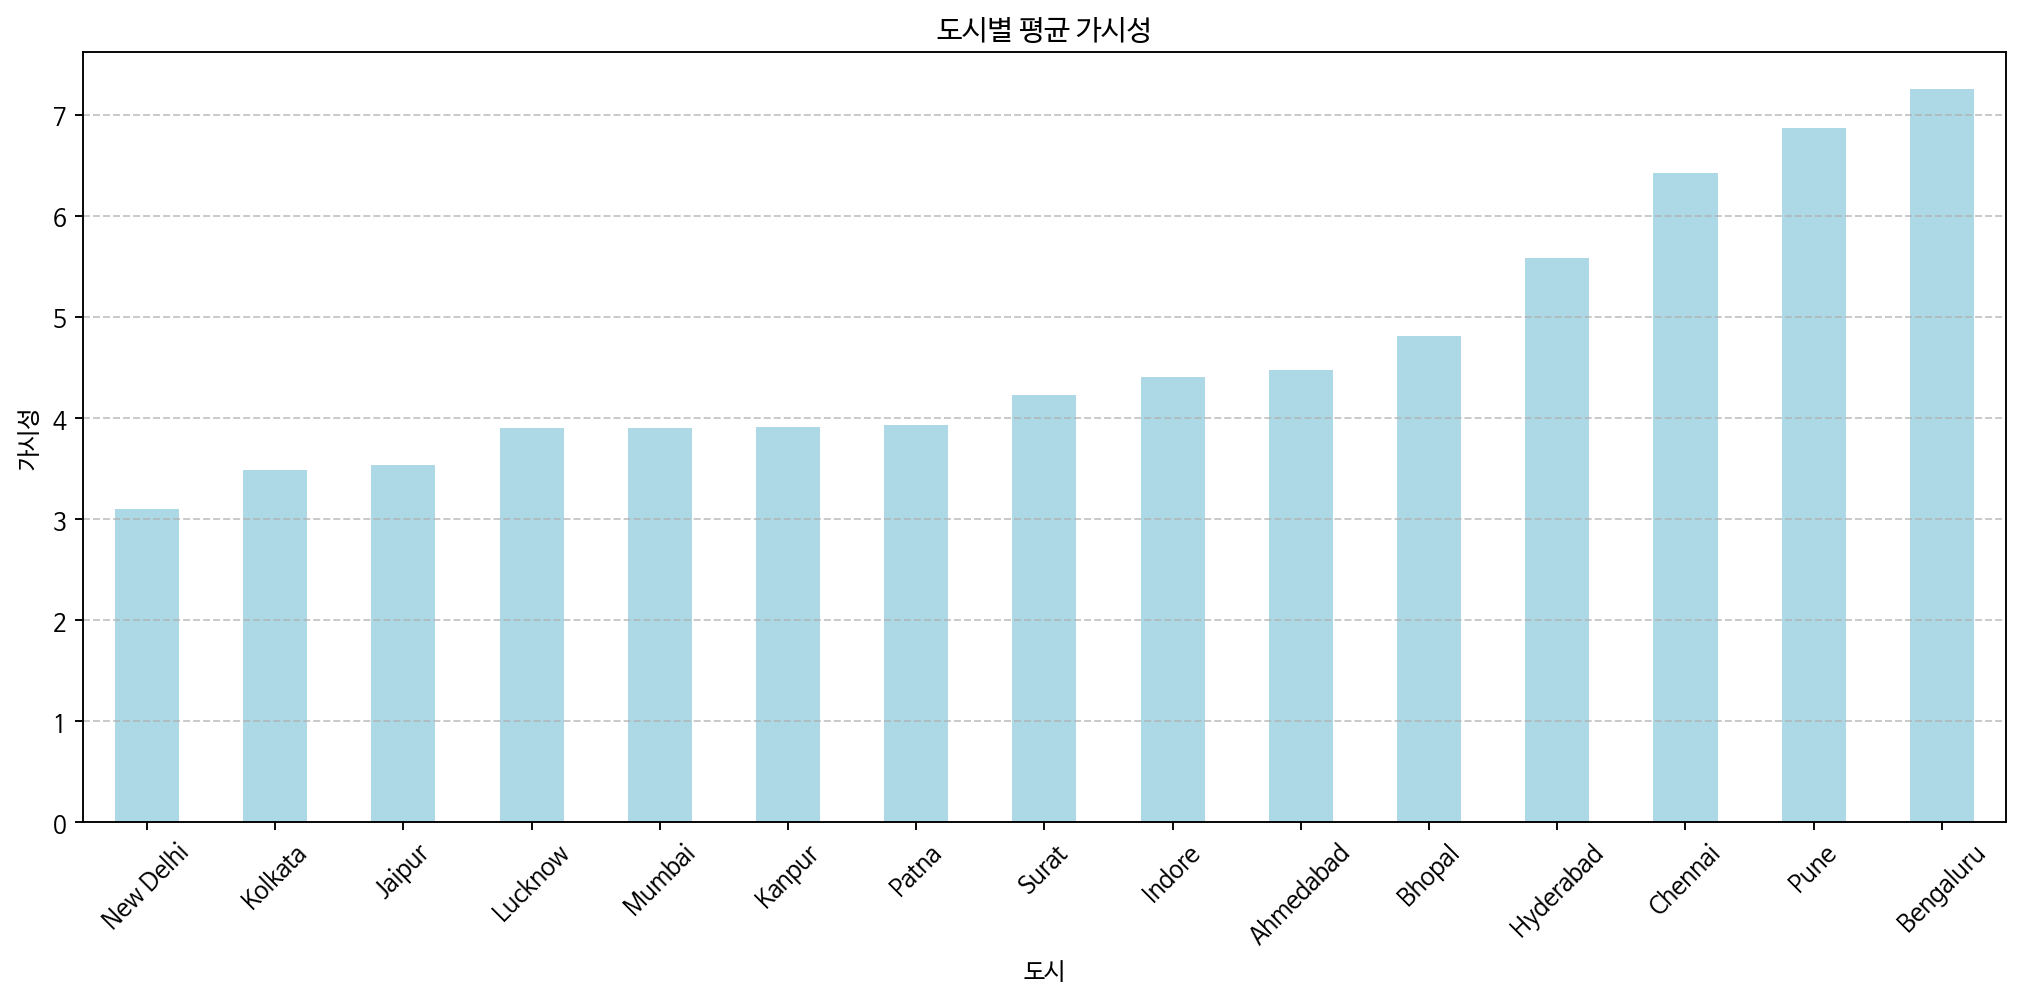

In [ ]:
# 도시별 평균 가시성 계산
city_visibility = df.groupby('City')['visibility'].mean()

# 시각화
plt.figure(figsize=(12, 6))
city_visibility.sort_values().plot(kind='bar', color='lightblue')
plt.title('도시별 평균 가시성')
plt.xlabel('도시')
plt.ylabel('가시성')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


도시별 가시성을 그래프로 표현했다.

New Delhi에서 가시성이 가장 낮다. 수도인 만큼 건물과 차량이 많아 대기 질이 나쁜 것으로 보인다.

가시성이 낮으면 운전 시 위험한 상황이 생길 수 있기 때문에 안전 운전을 강조하는 캠페인이나 공익 광고를 추진하여 사고를 예방할 수 있다.

2012~2021 인도의 도시별 기상 데이터를 시각화하여 비지니스와 관련된 스토리텔링을 해보았다.

물론 문화가 다르고 도시별로 인구도 다르기 때문에 기상 데이터 그래프만 보고 해당 도시에 물품에 대한 수요가 많고 적음을 확정짓긴 어려울 것이다.
기상 데이터가 아닌 다른 데이터들을 통해 더 의미있는 정보들을 얻을 수 있을 것이다.